# Summary of the Dataset

This dataset is a synthetic version inspired by the original Health Dataset of the individuals and enriched with additional variables. The dataset is structured for both categorical and continuous features.

The dataset contains 319795 records (rows) and 16 variables (Columns), each described below:

Column description


1. Sex:-Categorical
2. Age_Category:- Categorical
3. Heart Disease:-Categorical
4. AlcoholDrinking:-Categorical 
5. PhysicalHealth:-Integer
6. MentalHealth:-Integer
7. DiffWalking:-Categorical
8. BMI:-Float
9. KidneyDisease:-Categorical
10. Race:-Categorical
11. Diabetic:-Categorical
12. PhysicalActivity:-Categorical
13. GenHealth:-Categorical
14. SleepTime:-Integer
15. Smoking:-Categorical
16. Stroke (Target Variable): Categorical

# Import Libraries & ML Models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Load Dataset

In [2]:
df=pd.read_csv(r"C:\Users\mohit\OneDrive\Desktop\smoker.csv")
df

Sex  AgeCategory HeartDisease AlcoholDrinking Stroke  \
0       Female        55-59           No              No     No   
1       Female  80 or older           No              No    Yes   
2         Male        65-69           No              No     No   
3       Female        75-79           No              No     No   
4       Female        40-44           No              No     No   
...        ...          ...          ...             ...    ...   
319790    Male        60-64          Yes              No     No   
319791    Male        35-39           No              No     No   
319792  Female        45-49           No              No     No   
319793  Female        25-29           No              No     No   
319794  Female  80 or older           No              No     No   

        PhysicalHealth  MentalHealth DiffWalking    BMI KidneyDisease  \
0                    3            30          No  16.60            No   
1                    0             0          No  20.34            No   
2                   20            30          No  26.58            No   
3                    0             0          No  24.21            No   
4                   28             0         Yes  23.71            No   
...                ...           ...         ...    ...           ...   
319790               7             0         Yes  27.41            No   
319791               0             0          No  29.84            No   
319792               0             0          No  24.24            No   
319793               0             0          No  32.81            No   
319794               0             0          No  46.56            No   

            Race Diabetic PhysicalActivity  GenHealth  SleepTime Smoking  
0          White      Yes              Yes  Very good          5     Yes  
1          White       No              Yes  Very good          7      No  
2          White      Yes              Yes       Fair          8     Yes  
3          White       No               No       Good          6      No  
4          White       No              Yes  Very good          8      No  
...          ...      ...              ...        ...        ...     ...  
319790  Hispanic      Yes               No       Fair          6     Yes  
319791  Hispanic       No              Yes  Very good          5     Yes  
319792  Hispanic       No              Yes       Good          6      No  
319793  Hispanic       No               No       Good         12      No  
319794  Hispanic       No              Yes       Good          8      No  

[319795 rows x 16 columns]

# Assesment of the data

In [3]:
df.duplicated().sum()   # duplicate rows found

23587

In [4]:
df=df.drop_duplicates()  # Dropping duplicate rows

df.shape

(296208, 16)

In [5]:
df.isnull().sum()

Sex                 0
AgeCategory         0
HeartDisease        0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
BMI                 0
KidneyDisease       0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Smoking             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296208 entries, 0 to 319794
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               296208 non-null  object 
 1   AgeCategory       296208 non-null  object 
 2   HeartDisease      296208 non-null  object 
 3   AlcoholDrinking   296208 non-null  object 
 4   Stroke            296208 non-null  object 
 5   PhysicalHealth    296208 non-null  int64  
 6   MentalHealth      296208 non-null  int64  
 7   DiffWalking       296208 non-null  object 
 8   BMI               296208 non-null  float64
 9   KidneyDisease     296208 non-null  object 
 10  Race              296208 non-null  object 
 11  Diabetic          296208 non-null  object 
 12  PhysicalActivity  296208 non-null  object 
 13  GenHealth         296208 non-null  object 
 14  SleepTime         296208 non-null  int64  
 15  Smoking           296208 non-null  object 
dtypes: float64(1), int64

In [7]:
cat_col = df.select_dtypes(include=['object', 'category'])  # Categorical columns
cat_col

Sex  AgeCategory HeartDisease AlcoholDrinking Stroke DiffWalking  \
0       Female        55-59           No              No     No          No   
1       Female  80 or older           No              No    Yes          No   
2         Male        65-69           No              No     No          No   
3       Female        75-79           No              No     No          No   
4       Female        40-44           No              No     No         Yes   
...        ...          ...          ...             ...    ...         ...   
319790    Male        60-64          Yes              No     No         Yes   
319791    Male        35-39           No              No     No          No   
319792  Female        45-49           No              No     No          No   
319793  Female        25-29           No              No     No          No   
319794  Female  80 or older           No              No     No          No   

       KidneyDisease      Race Diabetic PhysicalActivity  GenHealth Smoking  
0                 No     White      Yes              Yes  Very good     Yes  
1                 No     White       No              Yes  Very good      No  
2                 No     White      Yes              Yes       Fair     Yes  
3                 No     White       No               No       Good      No  
4                 No     White       No              Yes  Very good      No  
...              ...       ...      ...              ...        ...     ...  
319790            No  Hispanic      Yes               No       Fair     Yes  
319791            No  Hispanic       No              Yes  Very good     Yes  
319792            No  Hispanic       No              Yes       Good      No  
319793            No  Hispanic       No               No       Good      No  
319794            No  Hispanic       No              Yes       Good      No  

[296208 rows x 12 columns]

In [8]:
num_col = df.select_dtypes(exclude=['object', 'category'])  # Numerical columns
num_col

PhysicalHealth  MentalHealth    BMI  SleepTime
0                    3            30  16.60          5
1                    0             0  20.34          7
2                   20            30  26.58          8
3                    0             0  24.21          6
4                   28             0  23.71          8
...                ...           ...    ...        ...
319790               7             0  27.41          6
319791               0             0  29.84          5
319792               0             0  24.24          6
319793               0             0  32.81         12
319794               0             0  46.56          8

[296208 rows x 4 columns]

In [9]:
for i in cat_col:                    # levels & its counts under each categorical columns
    print(i)
    print(cat_col[i].value_counts())
    print('*'*50)

Sex
Female    156951
Male      139257
Name: Sex, dtype: int64
**************************************************
AgeCategory
65-69          30780
60-64          30485
70-74          28457
55-59          27052
50-54          23353
80 or older    22873
75-79          20248
45-49          20241
18-24          19788
40-44          19598
35-39          19346
30-34          17803
25-29          16184
Name: AgeCategory, dtype: int64
**************************************************
HeartDisease
No     269024
Yes     27184
Name: HeartDisease, dtype: int64
**************************************************
AlcoholDrinking
No     274692
Yes     21516
Name: AlcoholDrinking, dtype: int64
**************************************************
Stroke
No     284147
Yes     12061
Name: Stroke, dtype: int64
**************************************************
DiffWalking
No     251899
Yes     44309
Name: DiffWalking, dtype: int64
**************************************************
KidneyDisease
No     284440

In [10]:
df.describe().round(2)

PhysicalHealth  MentalHealth        BMI  SleepTime
count       296208.00     296208.00  296208.00  296208.00
mean             3.64          4.19      28.48       7.08
std              8.20          8.18       6.50       1.48
min              0.00          0.00      12.02       1.00
25%              0.00          0.00      24.03       6.00
50%              0.00          0.00      27.41       7.00
75%              2.00          4.00      31.75       8.00
max             30.00         30.00      94.85      24.00

# Univariate Analysis

1. Analysis of categorical Features

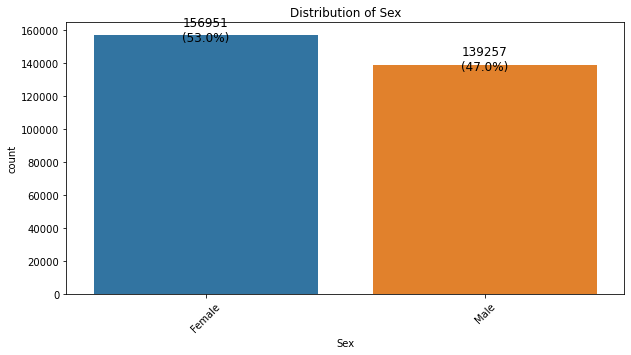

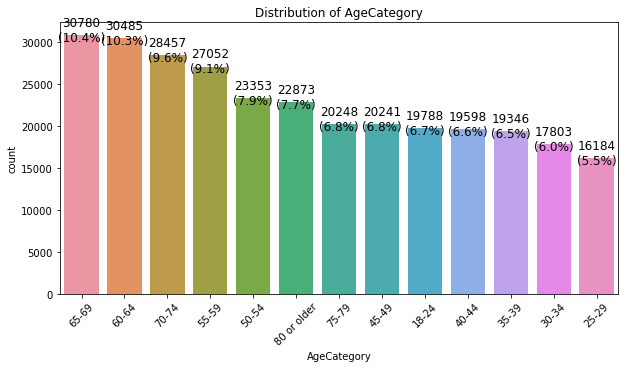

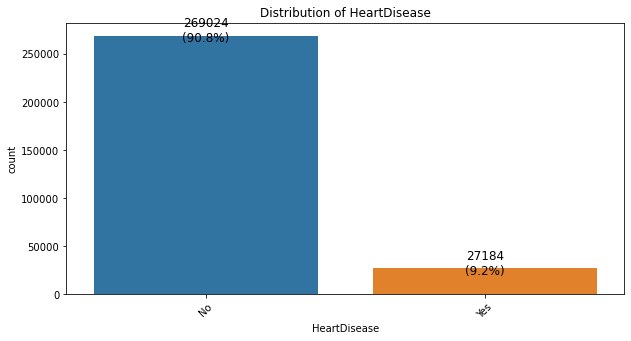

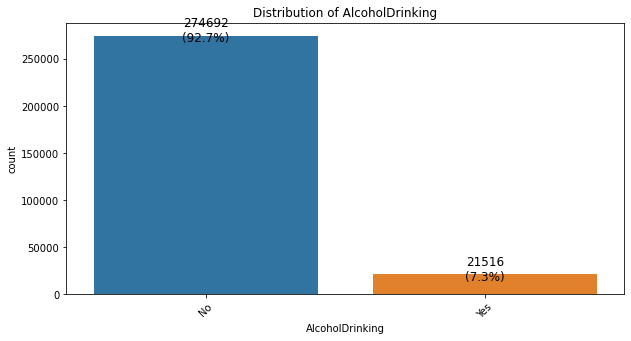

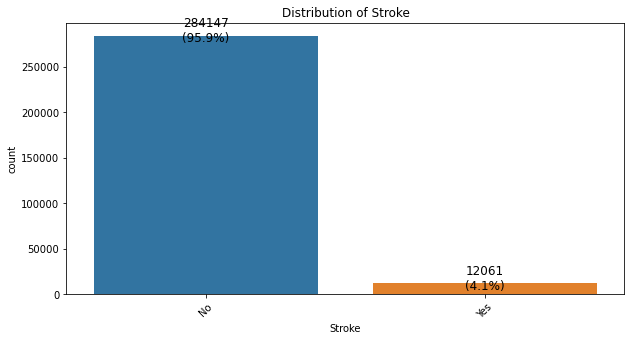

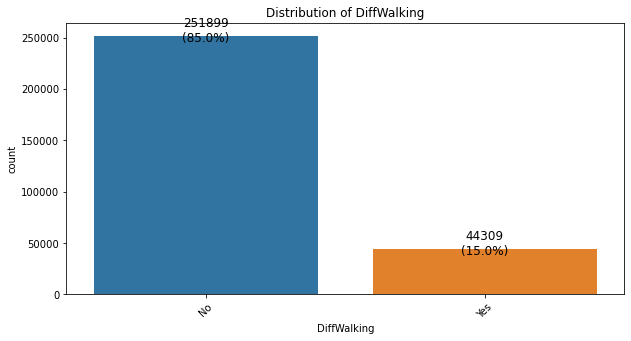

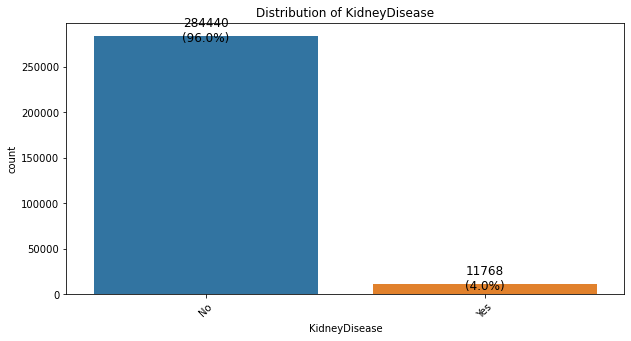

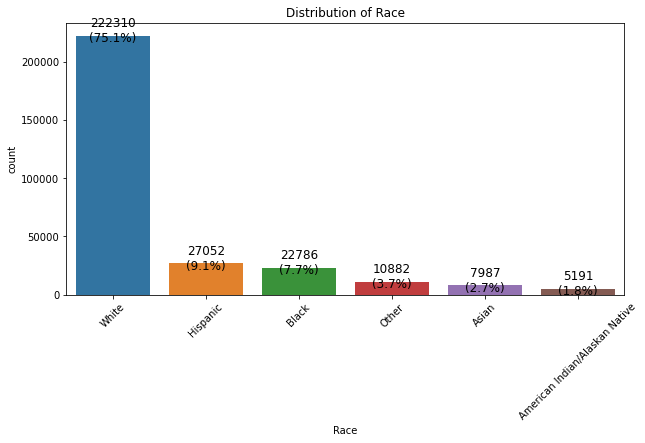

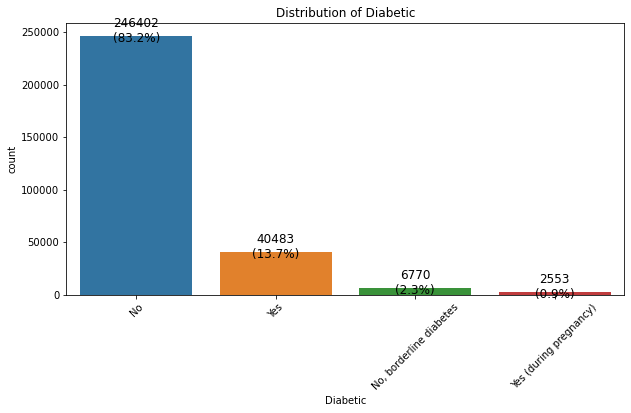

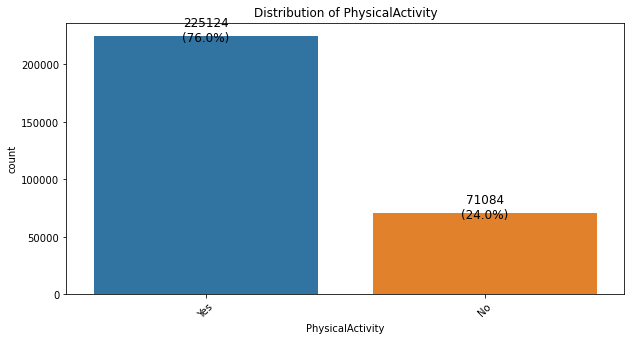

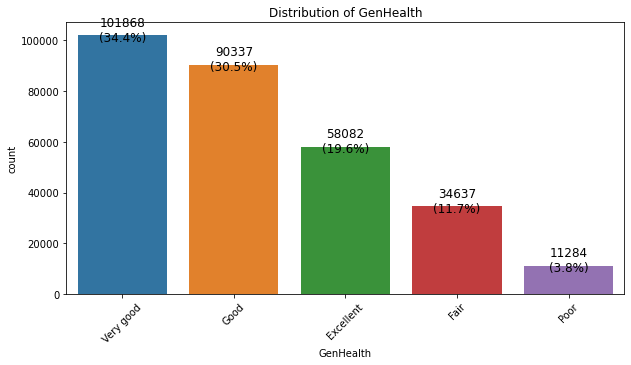

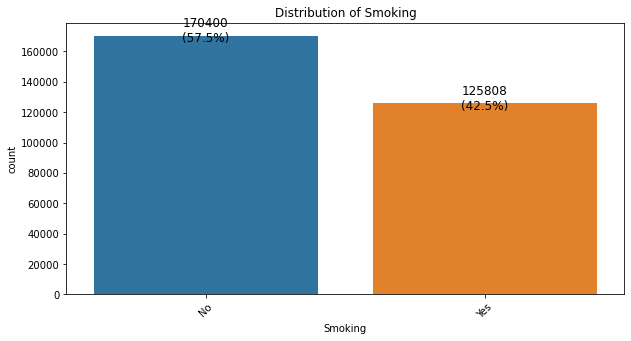

In [12]:
for col in cat_col:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

    # Calculate the total count
    total = len(df)

    # Add numbers and percentages on top of the bars
    for p in ax.patches:
        count = p.get_height()
        percentage = (count / total) * 100
        ax.annotate(f'{count}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')
    
    plt.show()

**Key Observations1 :- From the above graphs we can say that below listed features(Columns) are highly imbalanced**

1. Heart Disease
2. Alcohol Drinking
3. Stroke 
4. Kidney Disease
5. Diabetic
6. Diff Walking

In [15]:
num_col.head()

PhysicalHealth  MentalHealth    BMI  SleepTime
0               3            30  16.60          5
1               0             0  20.34          7
2              20            30  26.58          8
3               0             0  24.21          6
4              28             0  23.71          8

2. Analysis of Numerical features using Histogram plot

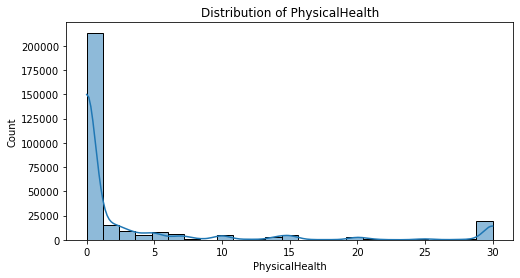

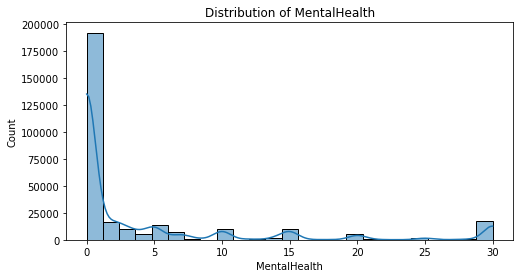

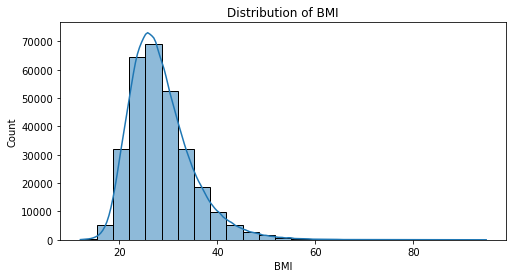

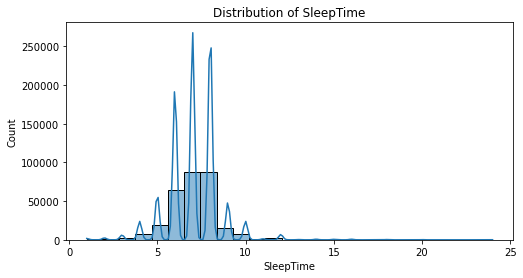

In [16]:
for col in num_col:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=25)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

In [17]:
for i in num_col:
    print(i,"==",num_col[i].skew().round(2))
    num_col[i].skew()

PhysicalHealth == 2.47
MentalHealth == 2.21
BMI == 1.29
SleepTime == 0.7


Key Obervatioins 2:- from the above details we can say that features- Physical Health, Mental Health,and BMI are rightly skewed & Sleep time is near to normally skewed

3.Analysis of Numerical features using Box plot

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


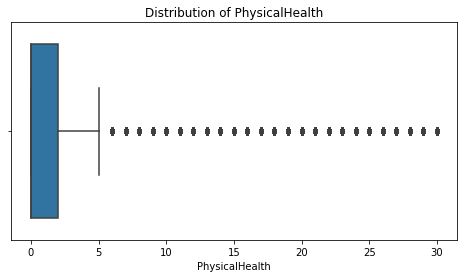

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


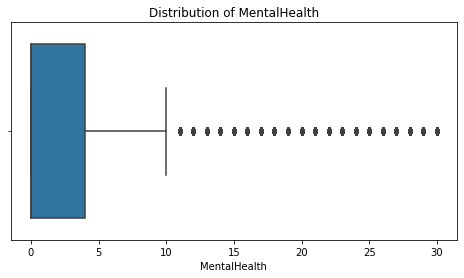

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


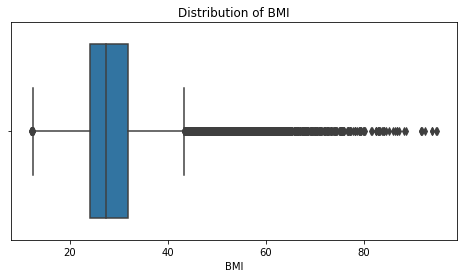

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


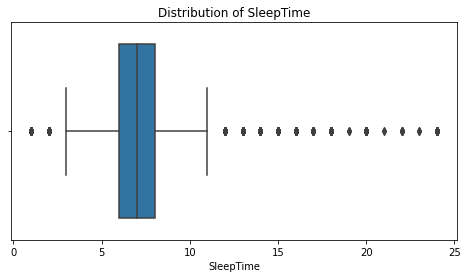

In [18]:
for col in num_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()


Key observations 3:- from the above boxplot we can say that mentioned features are having outliers

# Bivariate Analysis

1. Categorical vs Numerical using Box plot

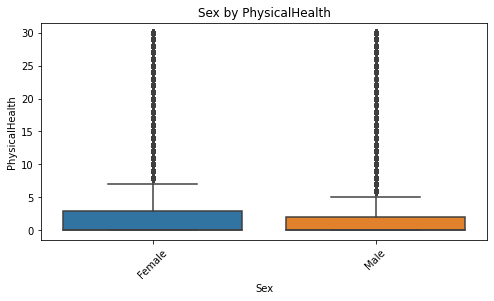

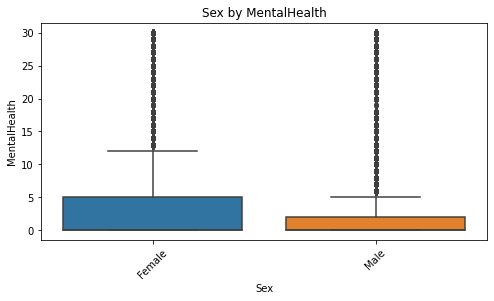

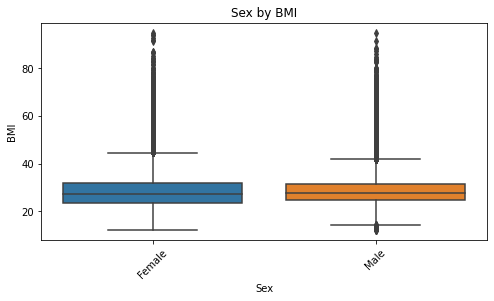

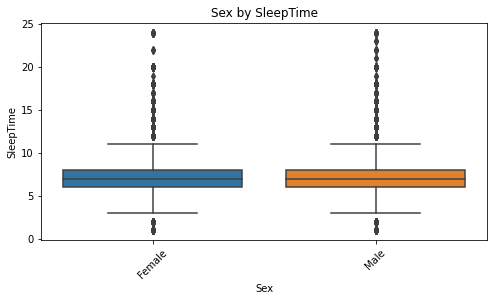

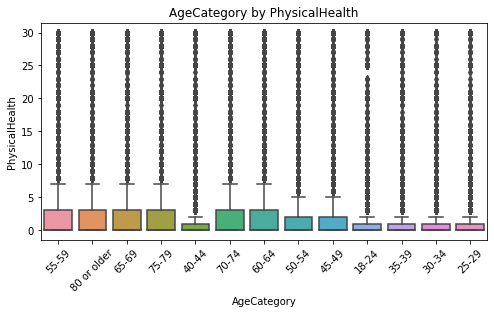

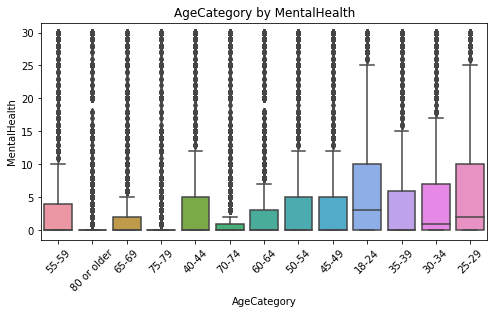

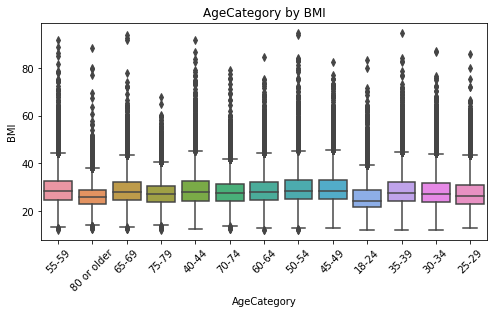

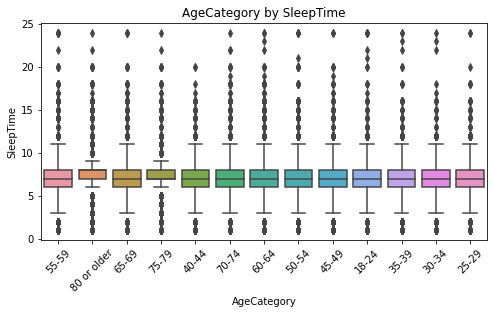

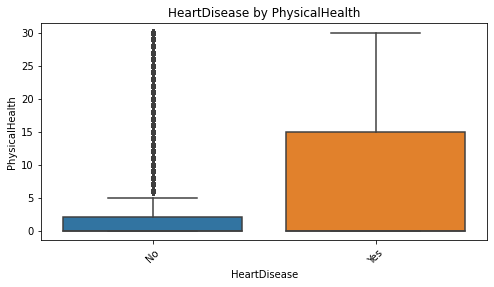

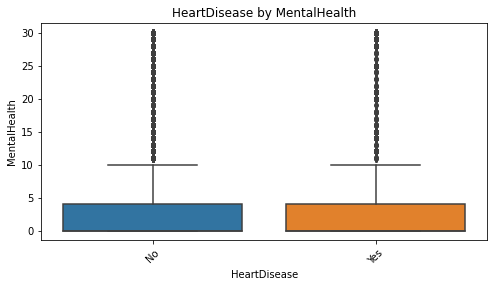

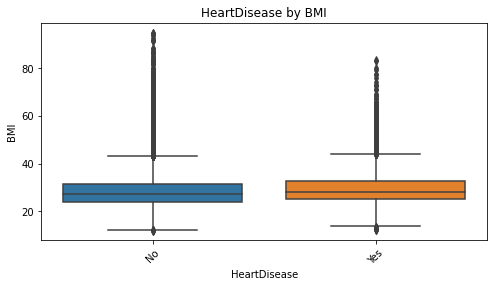

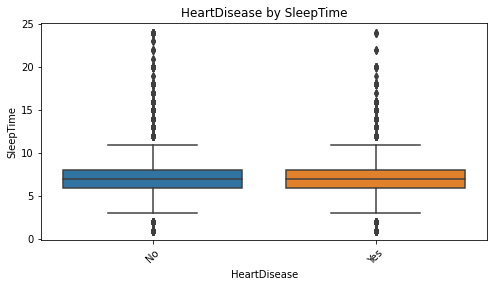

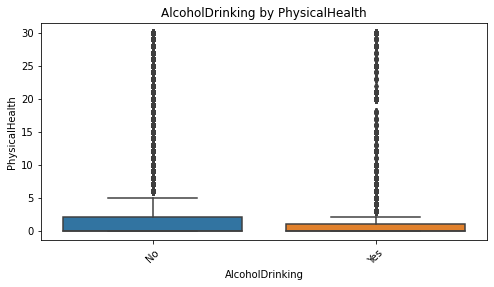

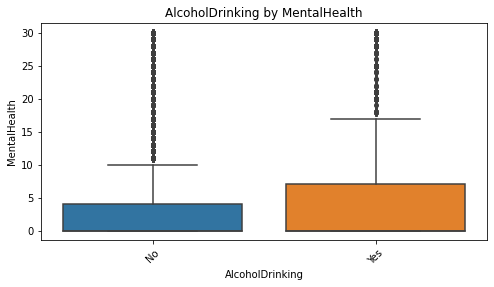

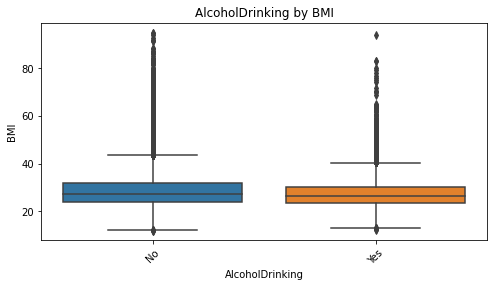

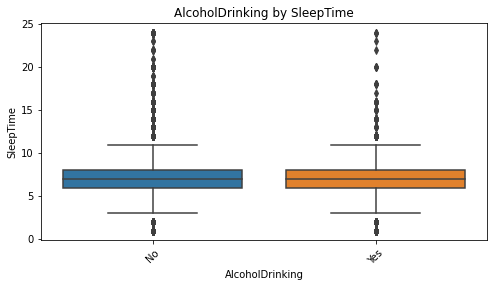

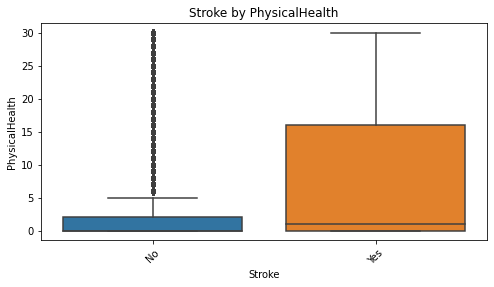

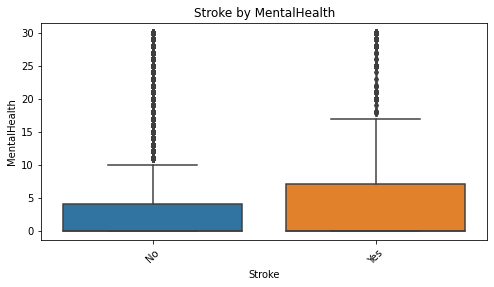

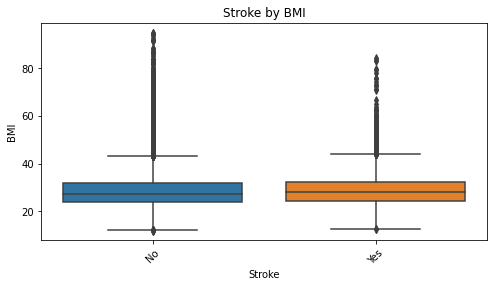

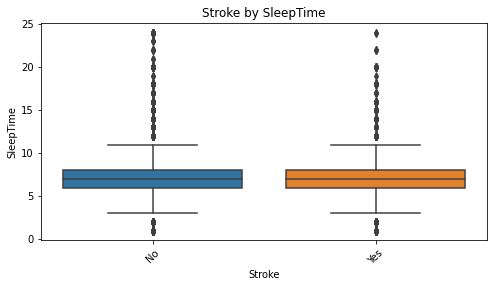

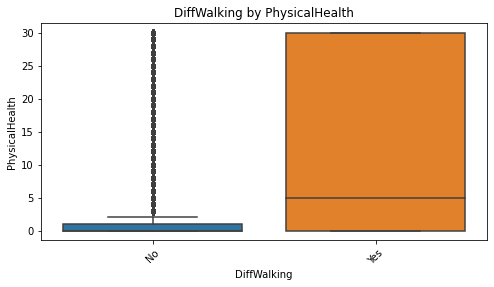

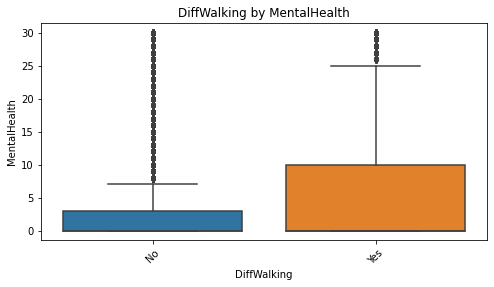

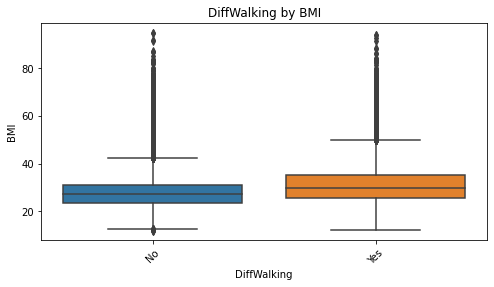

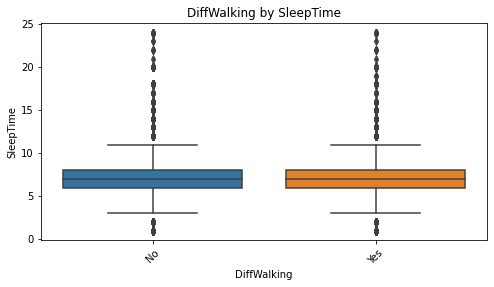

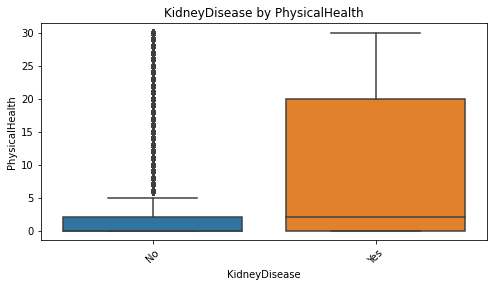

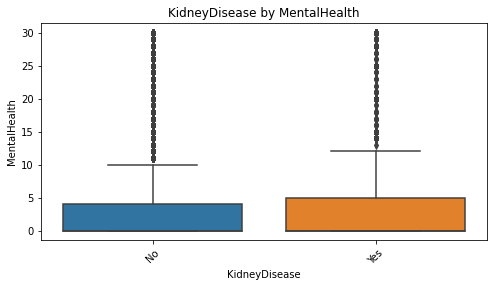

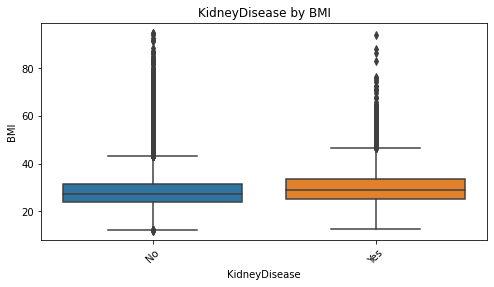

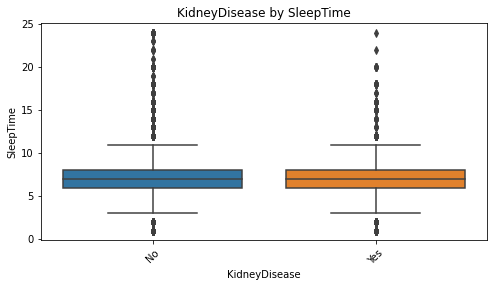

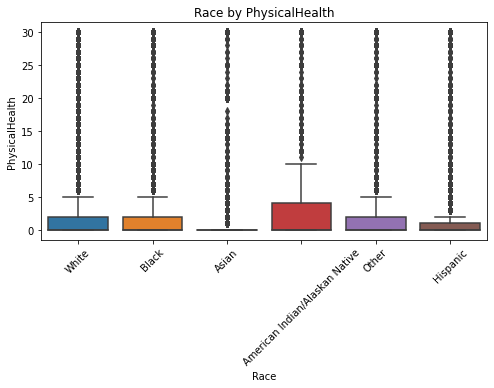

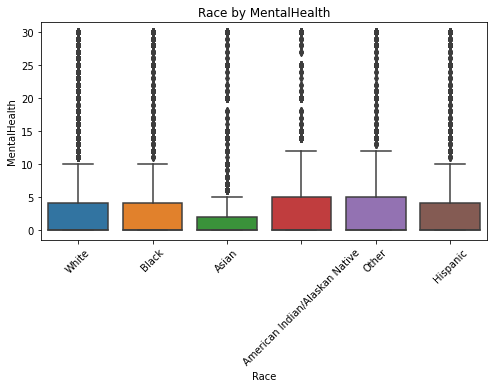

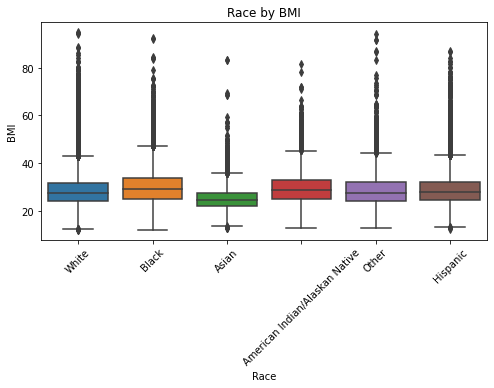

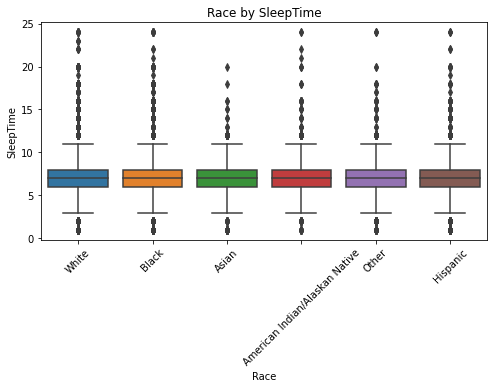

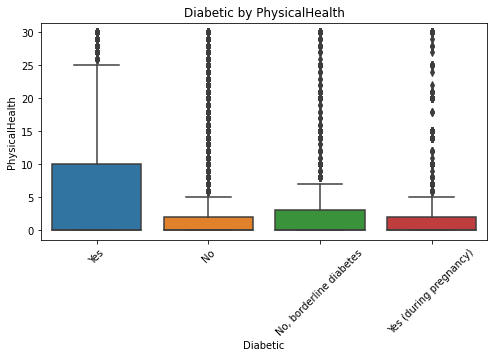

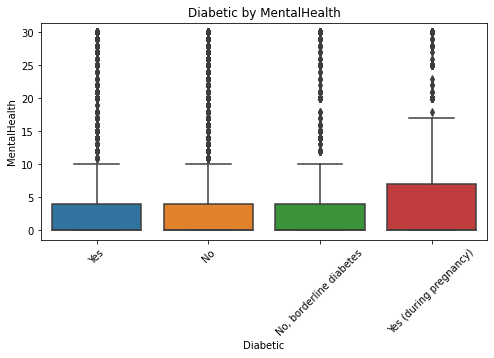

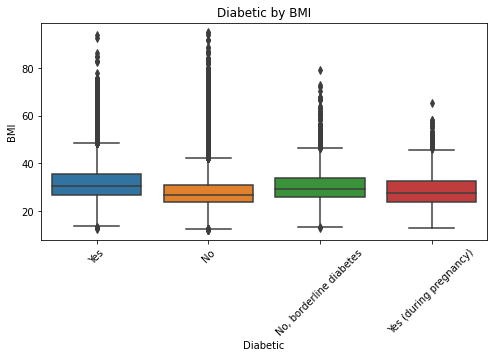

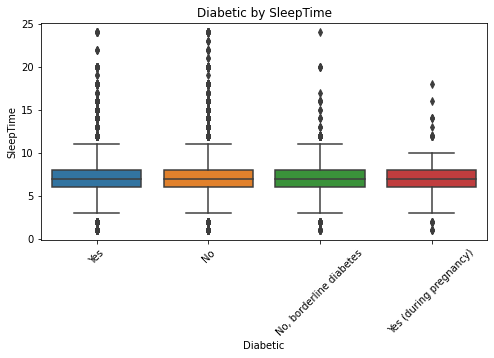

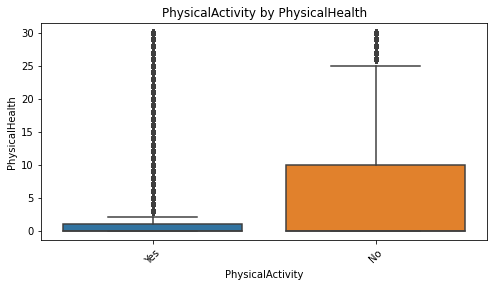

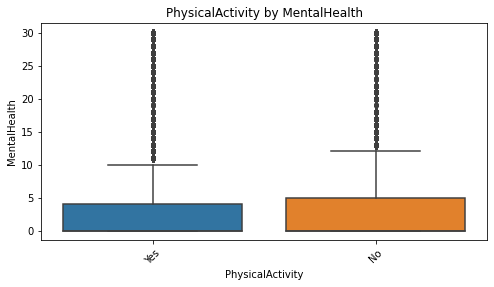

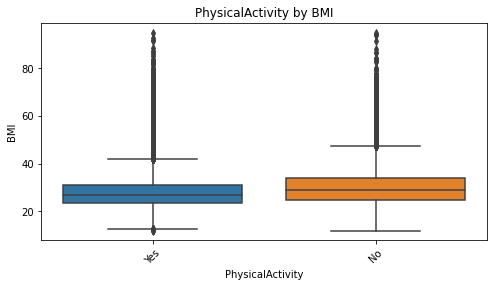

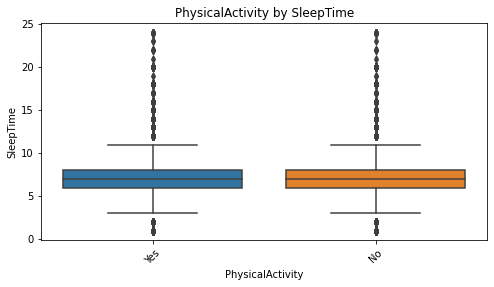

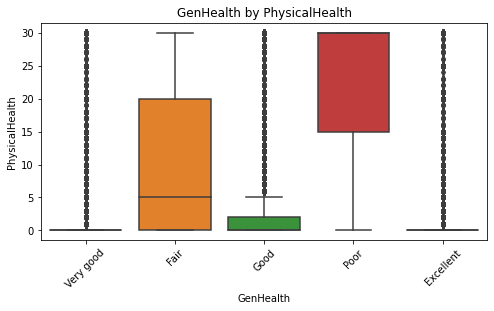

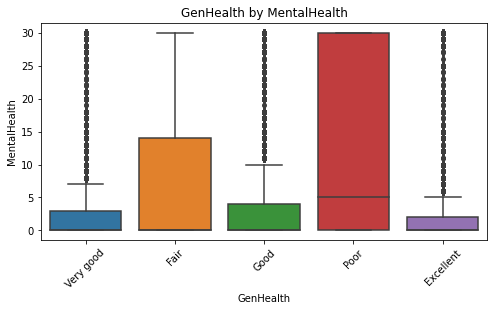

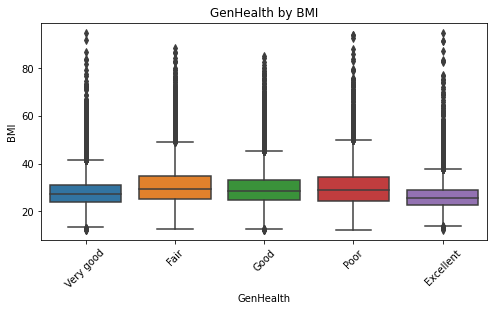

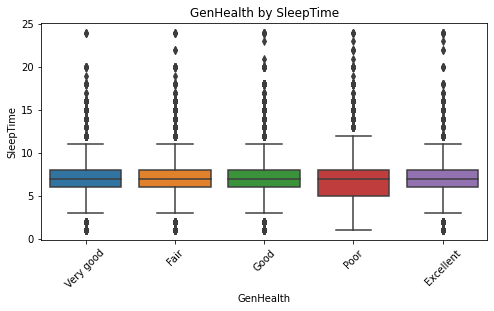

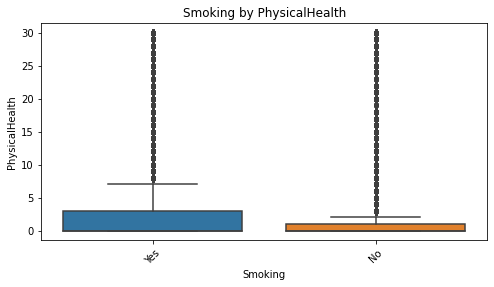

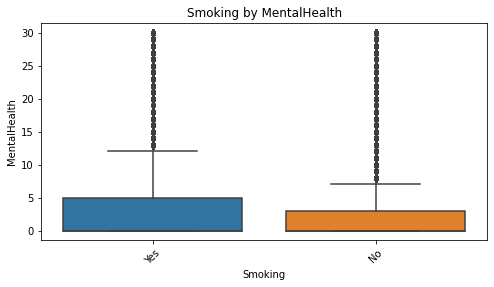

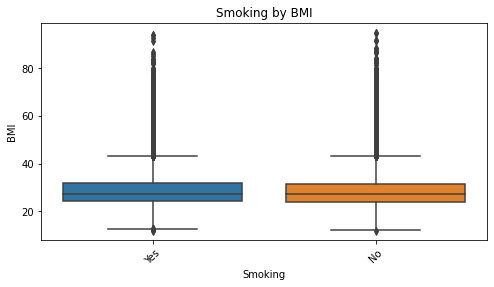

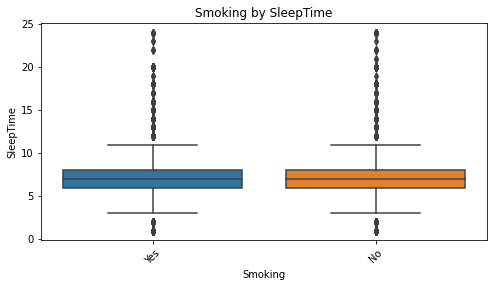

In [19]:
for i in cat_col:
    for j in num_col:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x=i, y=j)
        plt.title(f'{i} by {j}')
        plt.xticks(rotation=45)
        plt.show()

**Key observations 4:-self Explanatory**

2.Categorical vs Numerical using Scatter plot

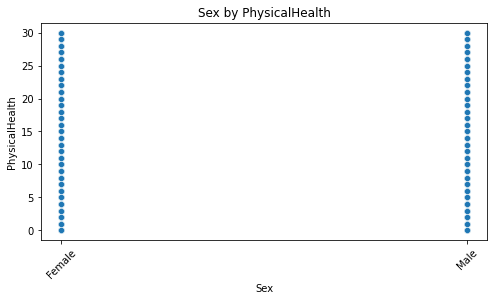

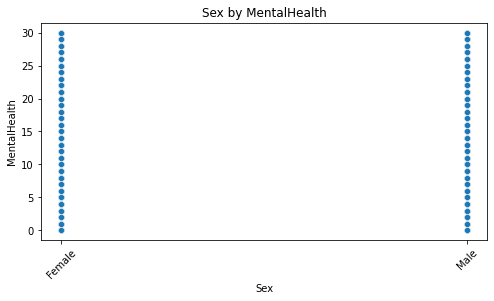

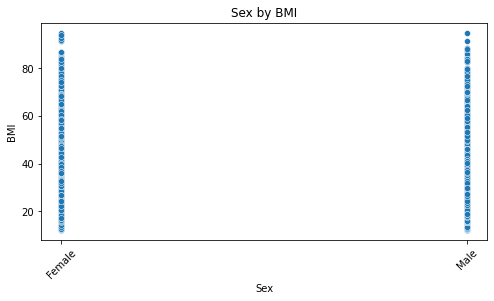

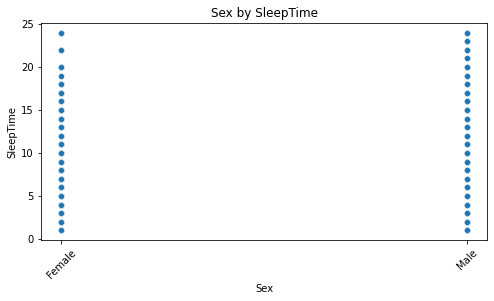

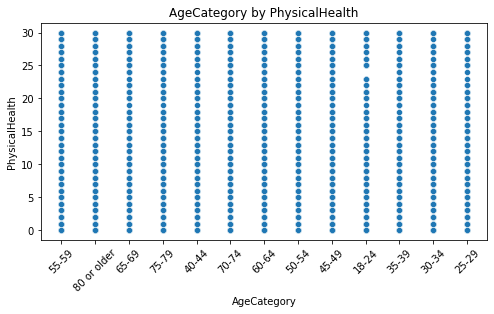

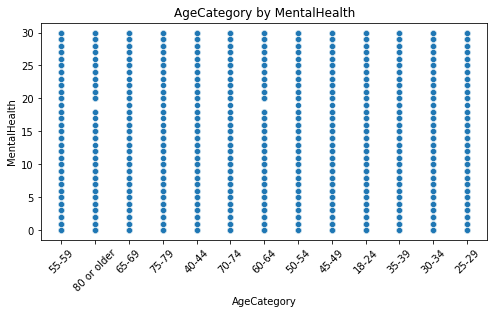

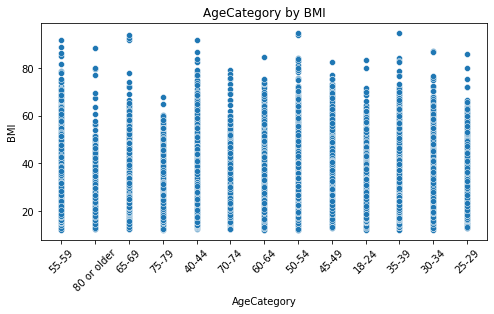

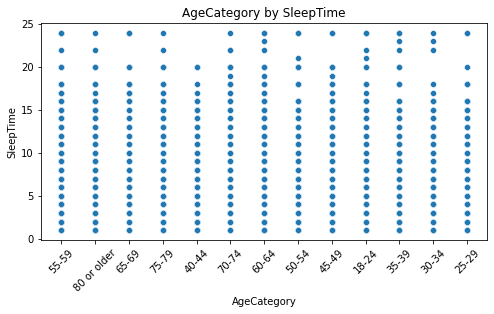

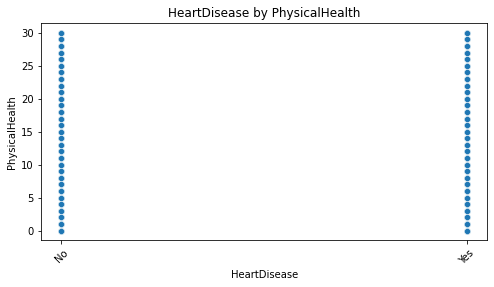

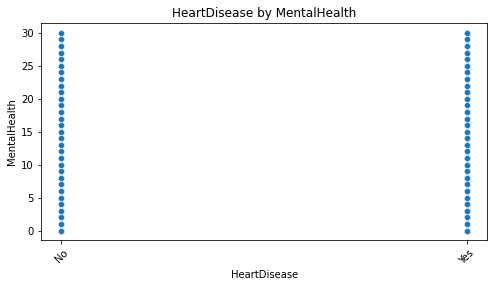

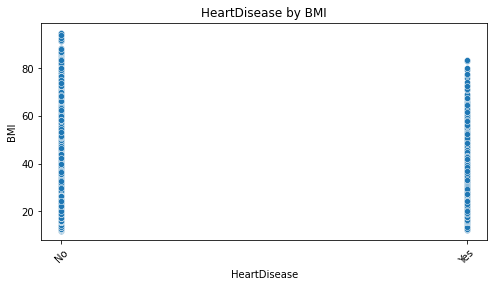

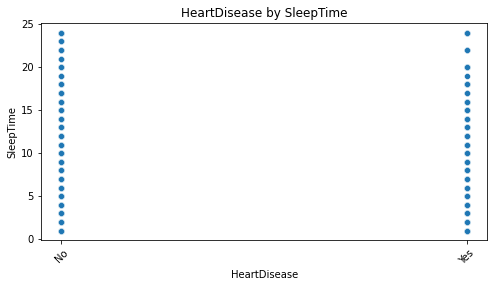

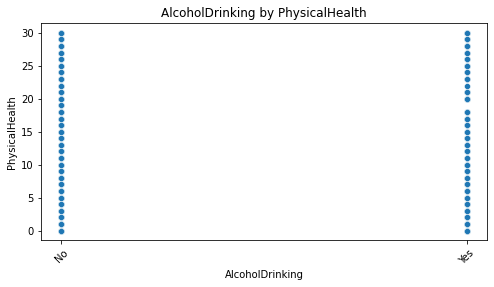

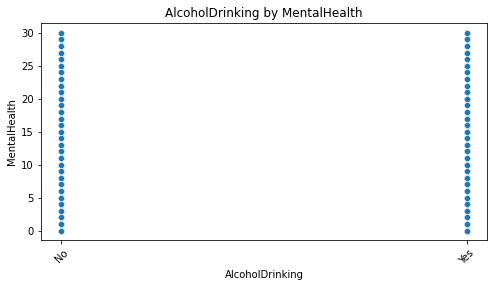

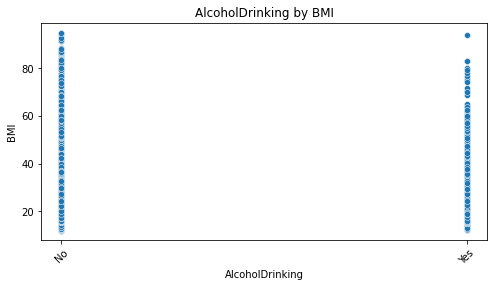

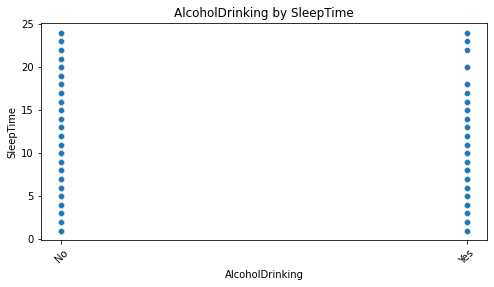

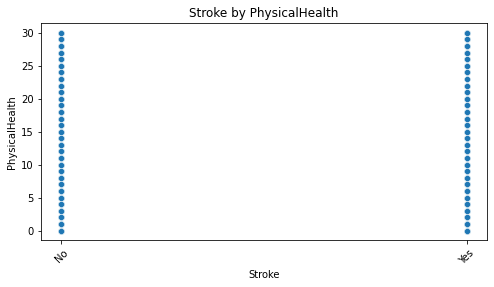

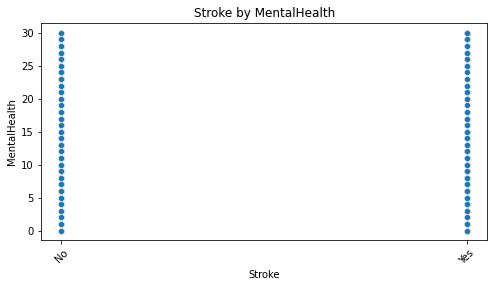

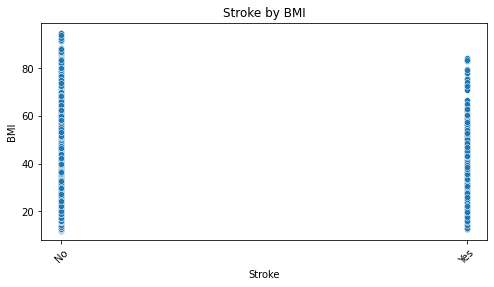

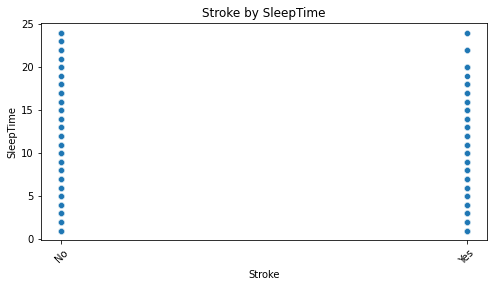

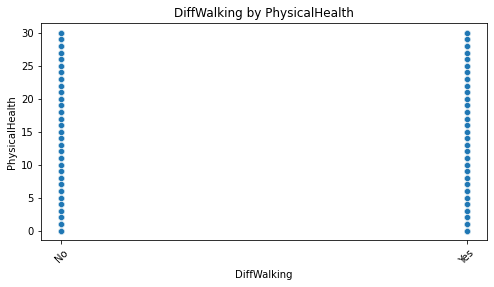

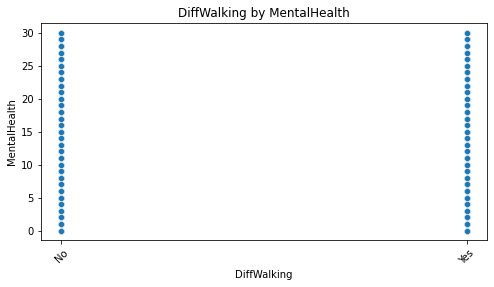

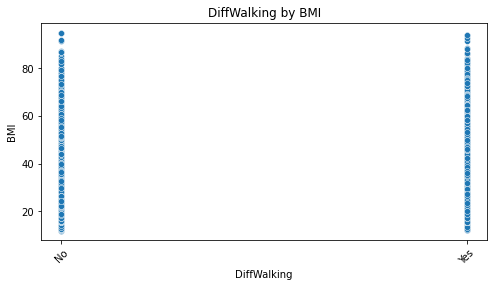

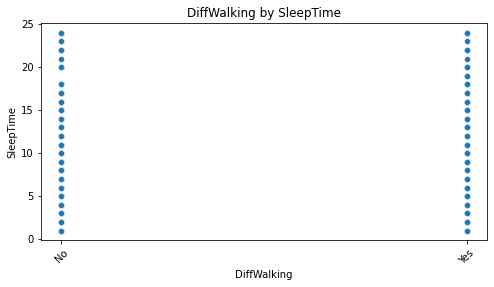

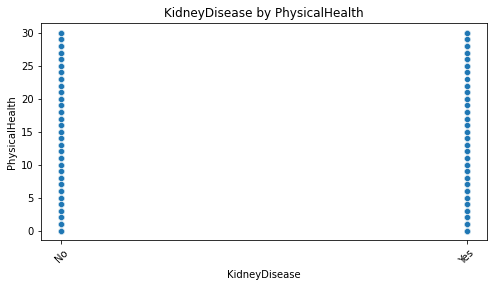

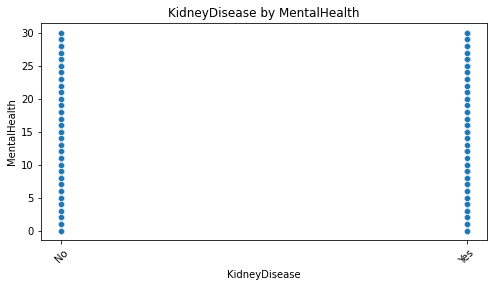

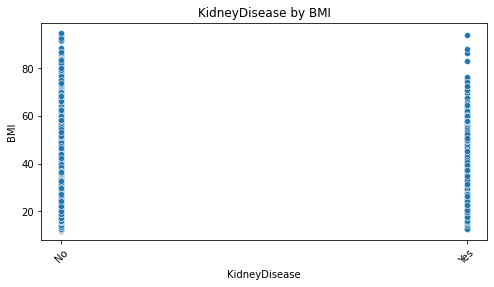

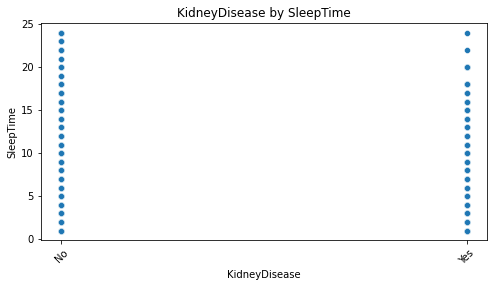

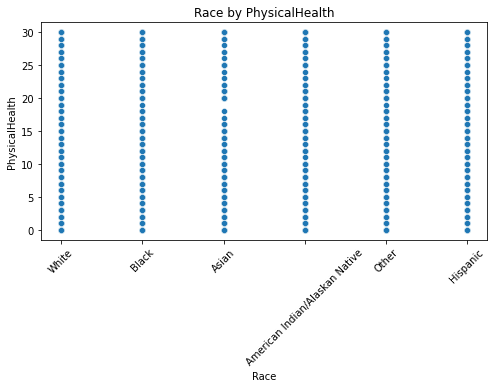

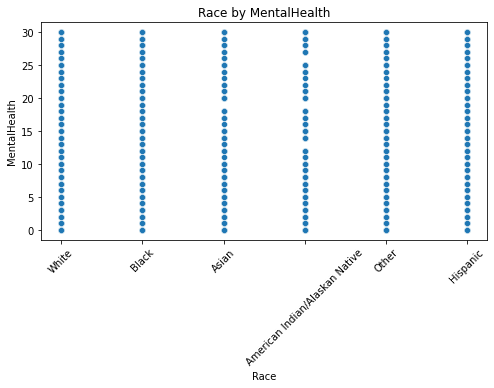

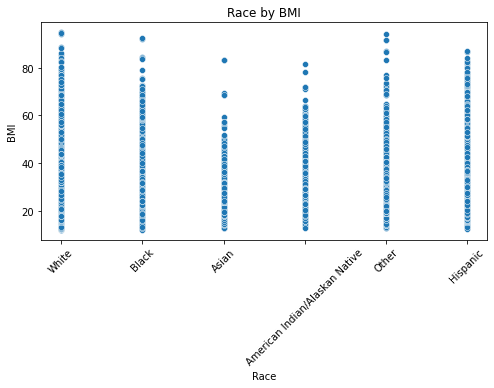

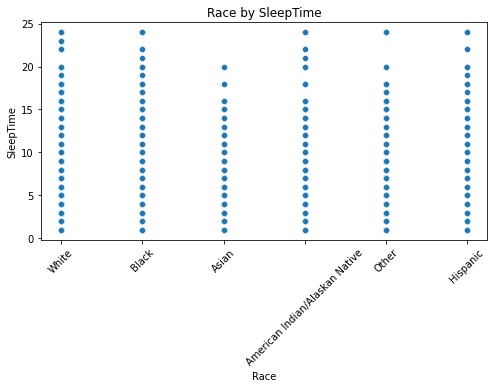

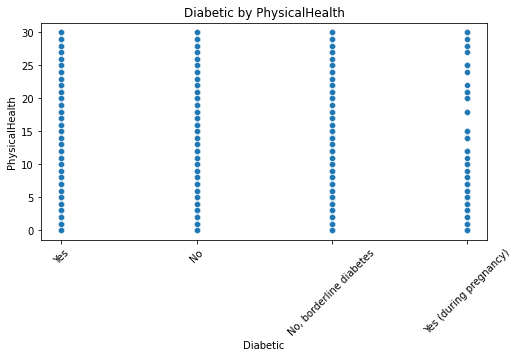

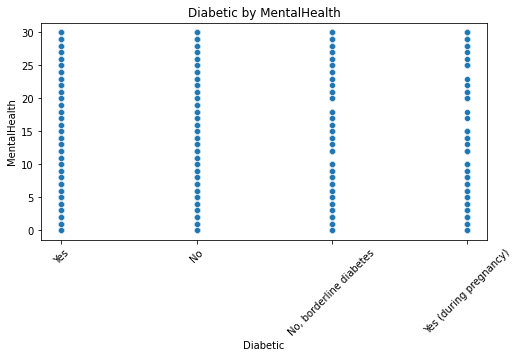

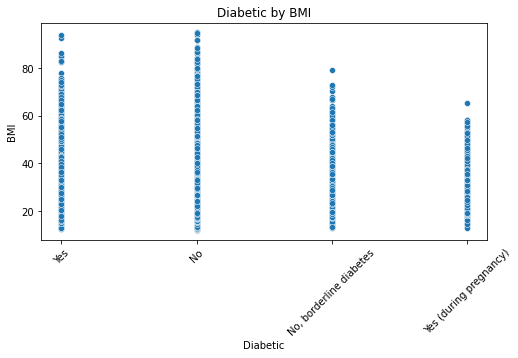

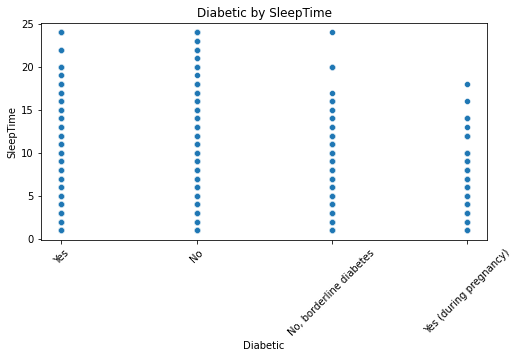

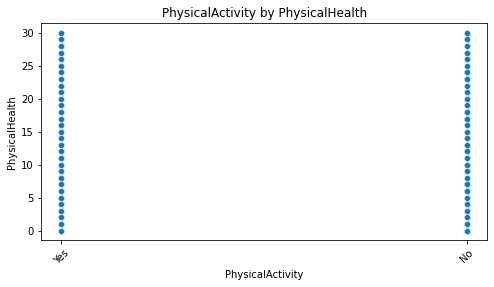

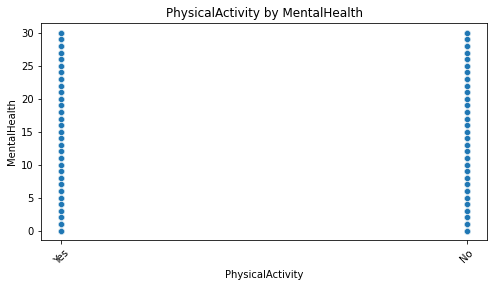

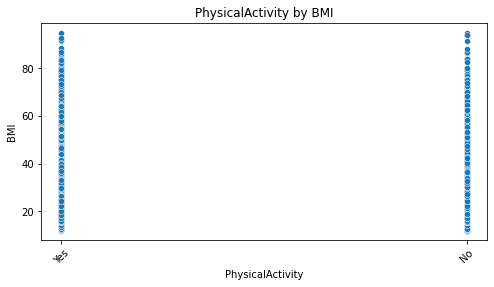

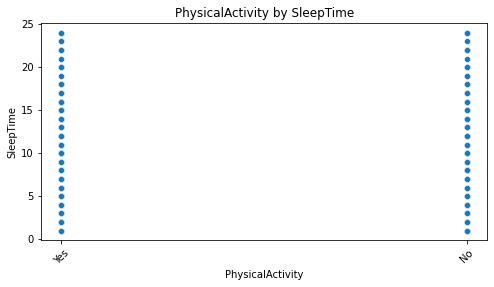

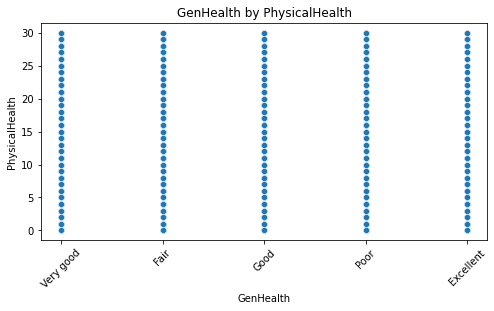

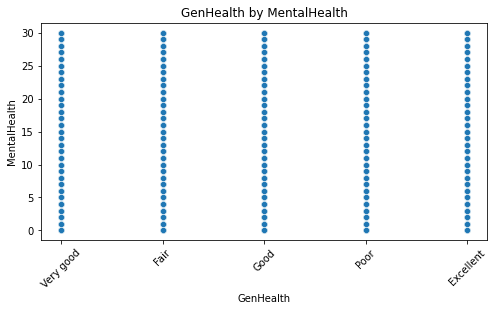

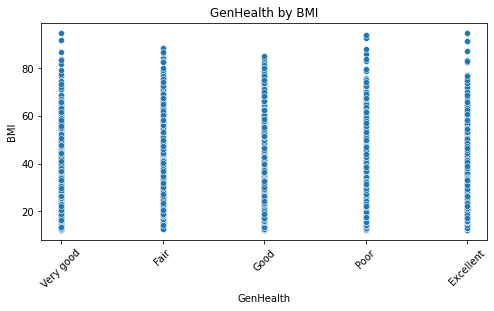

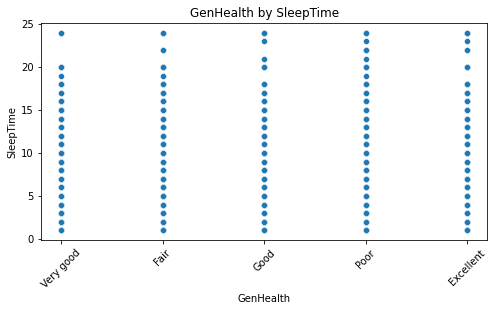

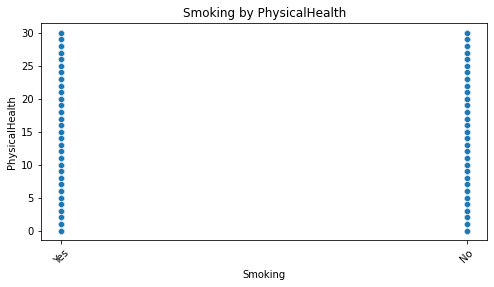

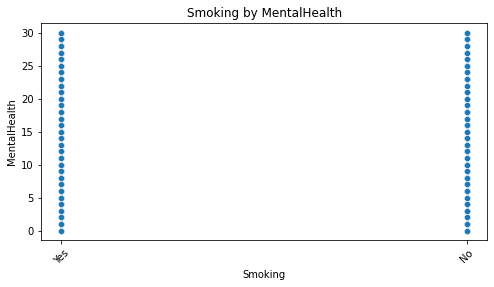

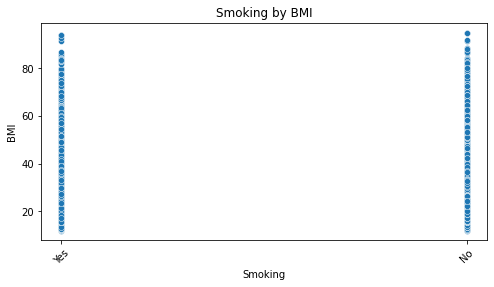

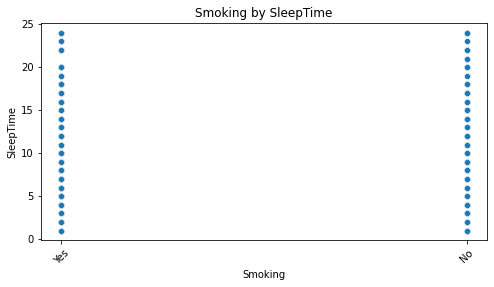

In [20]:
for i in cat_col:
    for j in num_col:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(data=df, x=i, y=j)
        plt.title(f'{i} by {j}')
        plt.xticks(rotation=45)
        plt.show()

**Key observations 5:-self Explanatory**

3. Numercial vs Numerical using Scatter plot

In [23]:
num_col_1=num_col.columns.to_list()
num_col_1

['PhysicalHealth', 'MentalHealth', 'BMI', 'SleepTime']

In [24]:
cat_col_1=cat_col.columns.to_list()
cat_col_1

['Sex',
 'AgeCategory',
 'HeartDisease',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'KidneyDisease',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Smoking']

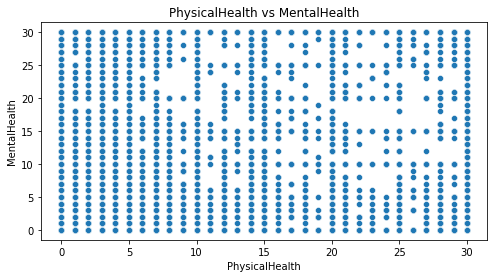

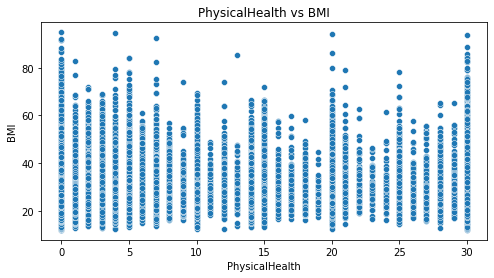

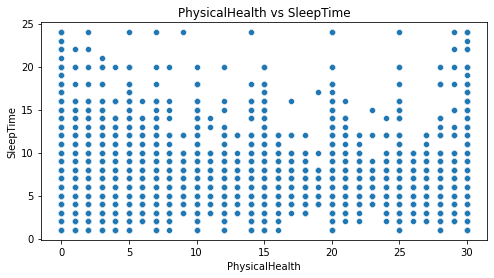

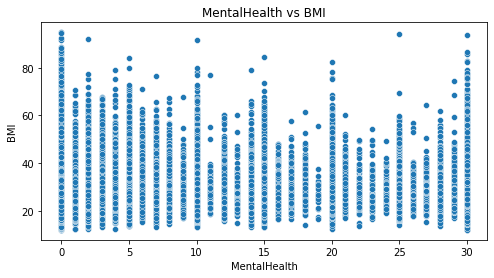

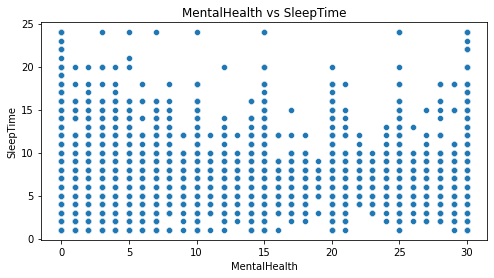

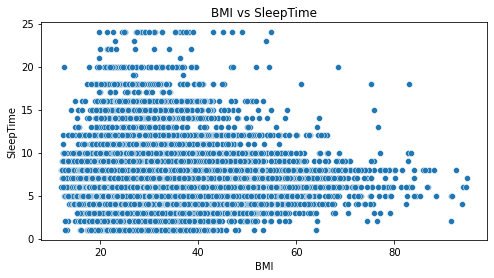

In [25]:
for i in range(len(num_col_1)):
    for j in range(i + 1, len(num_col_1)):
        plt.figure(figsize=(8, 4))
        sns.scatterplot(data=df, x=num_col_1[i], y=num_col_1[j])
        plt.title(f'{num_col_1[i]} vs {num_col_1[j]}')
        plt.show()

**Key obervations 6:- Self Explanatory**

4.Categorical vs Categorical using cross tab

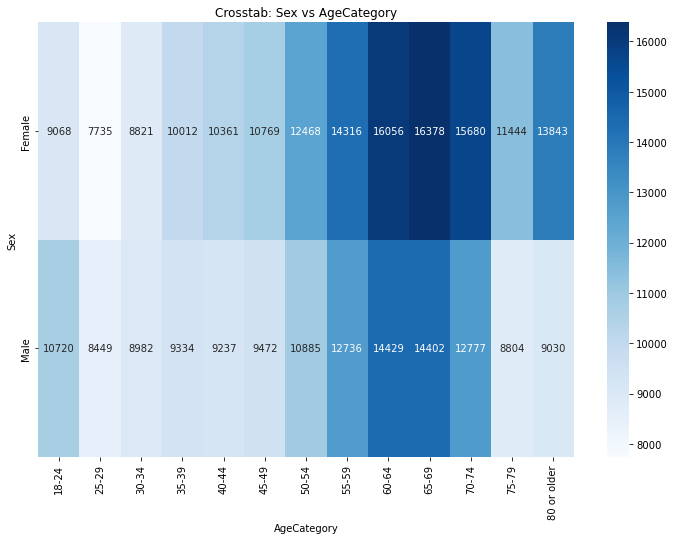

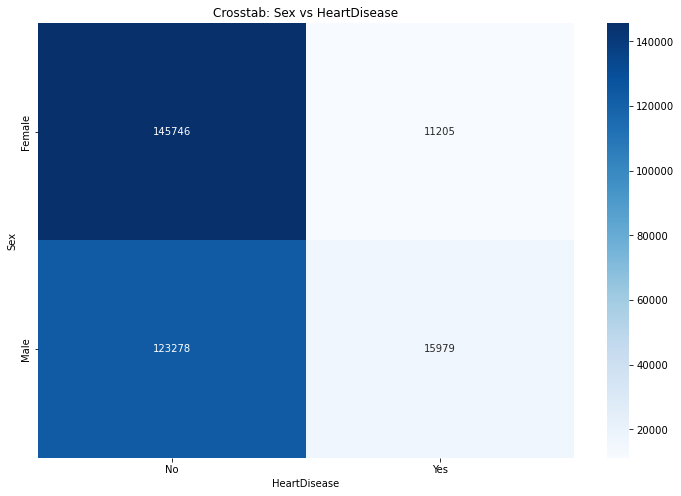

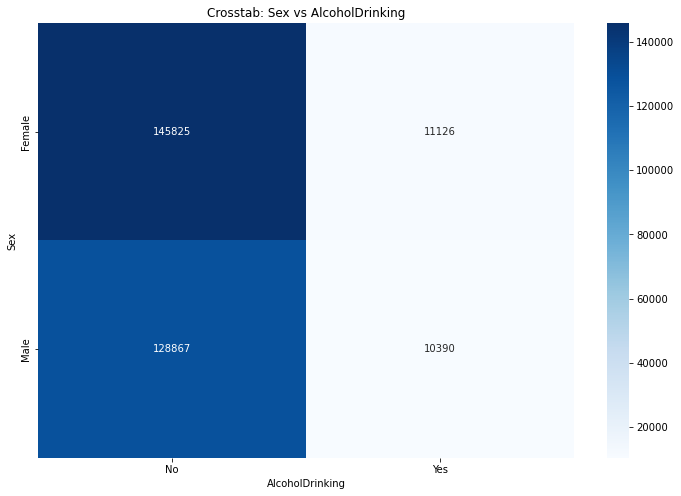

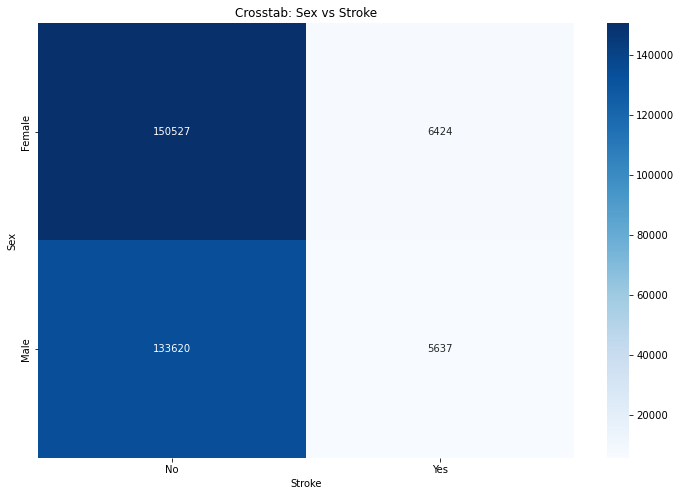

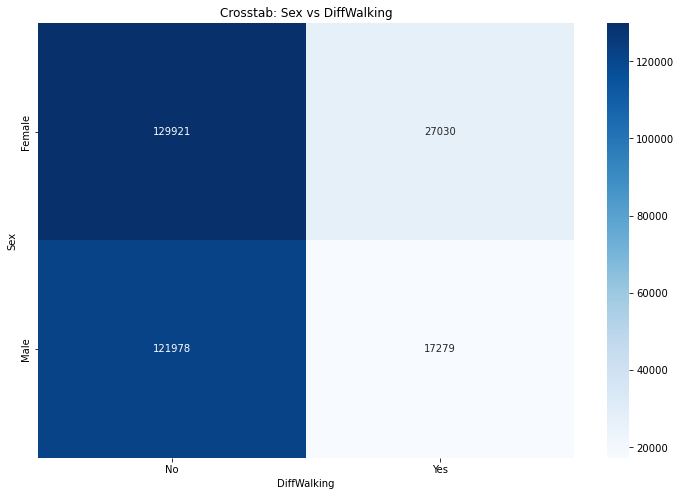

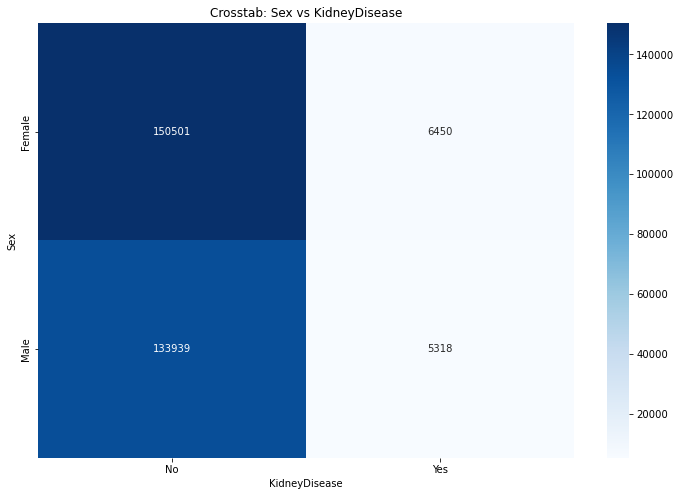

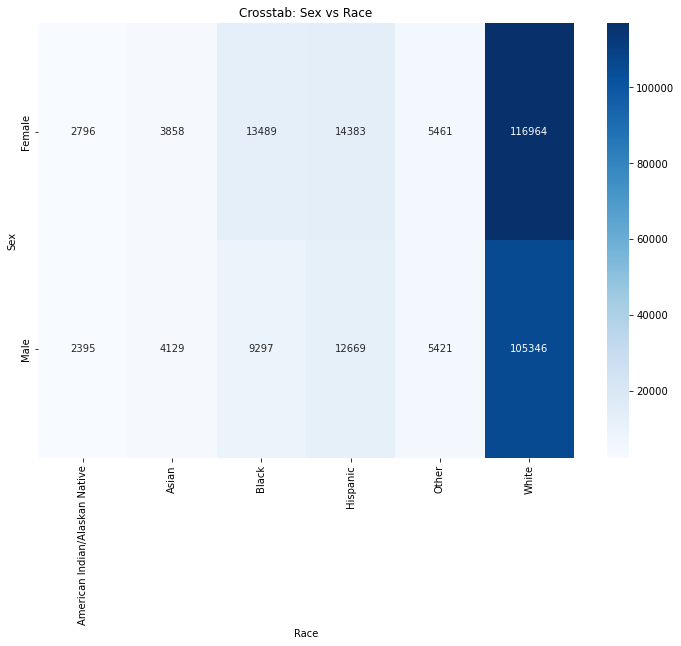

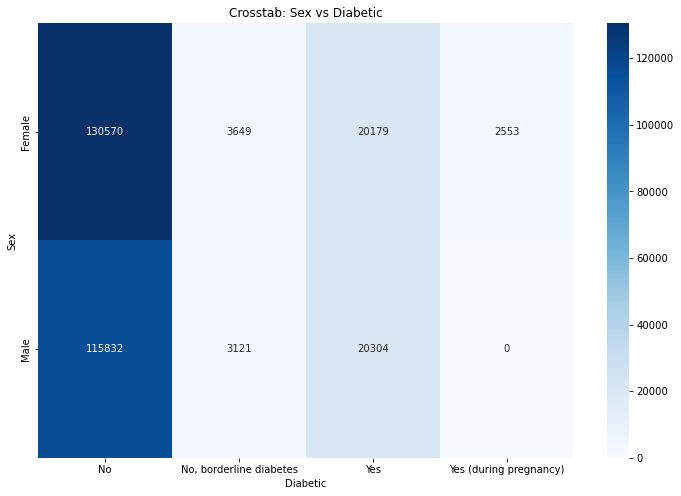

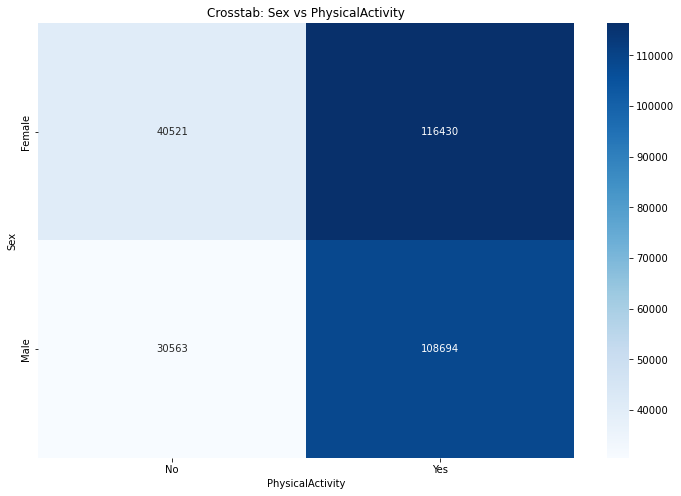

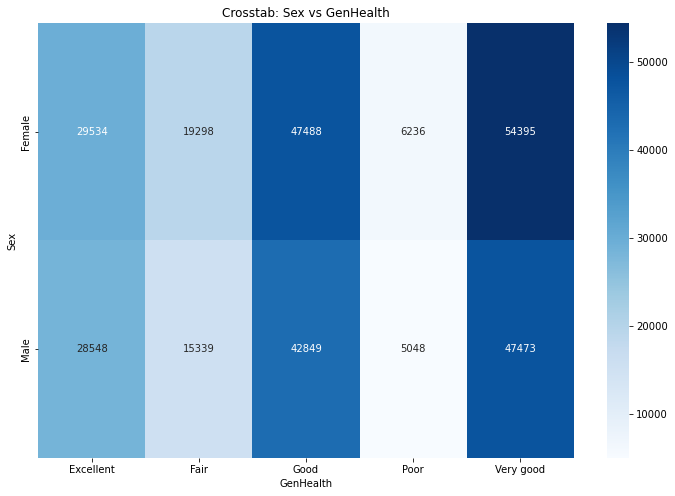

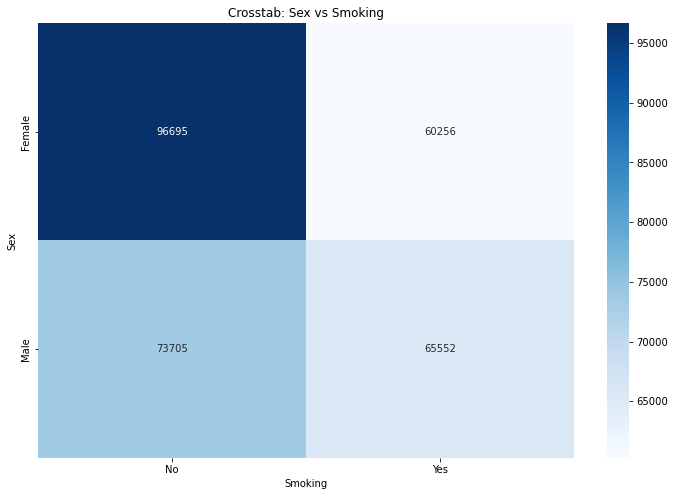

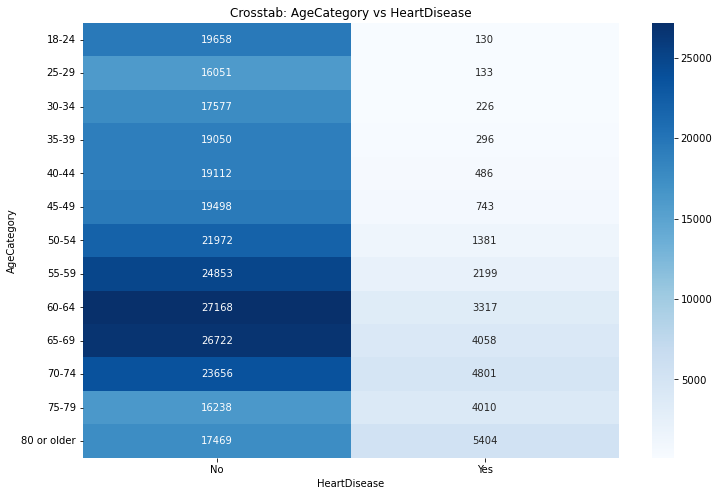

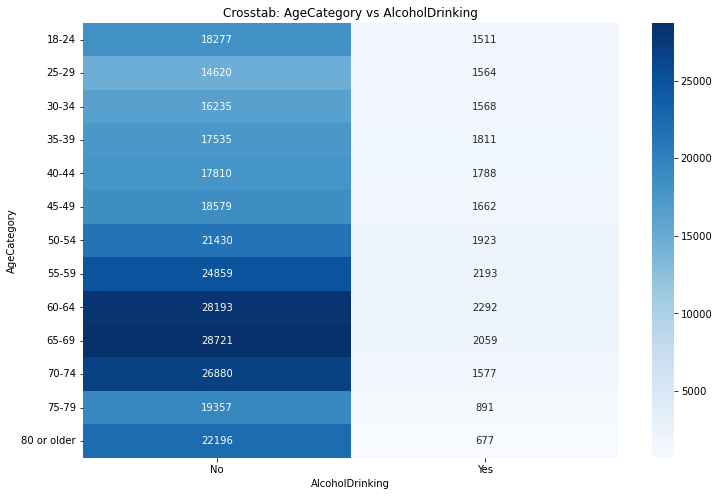

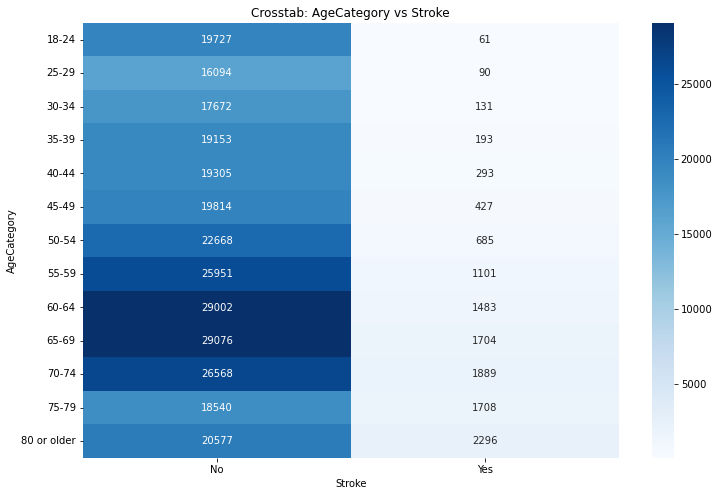

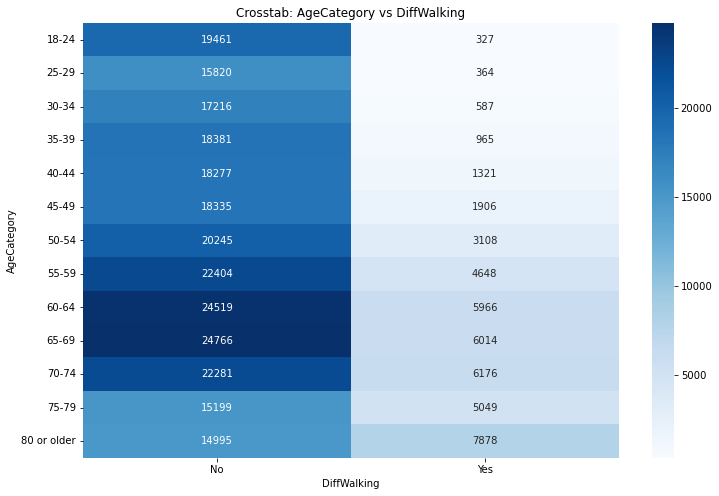

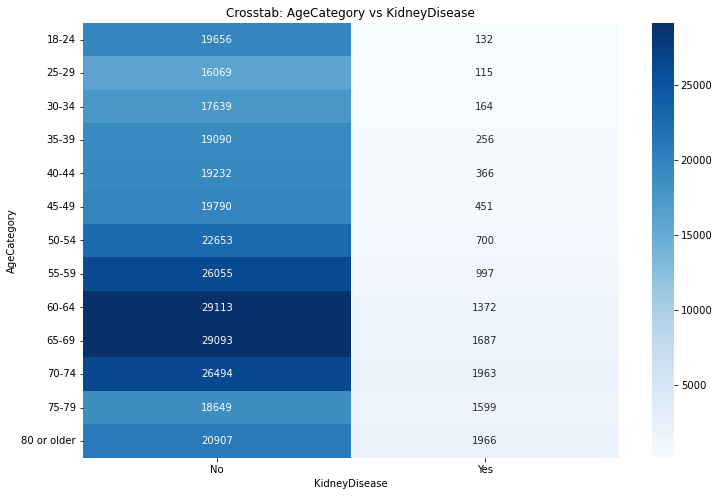

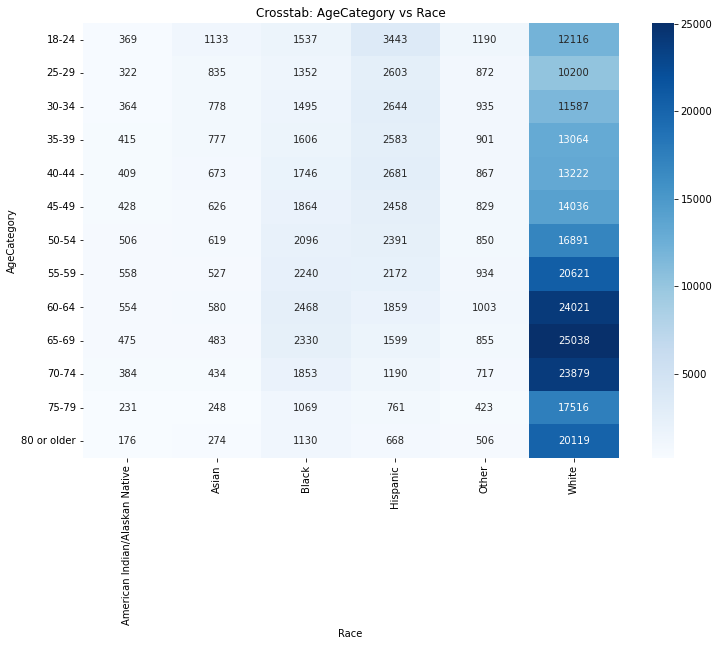

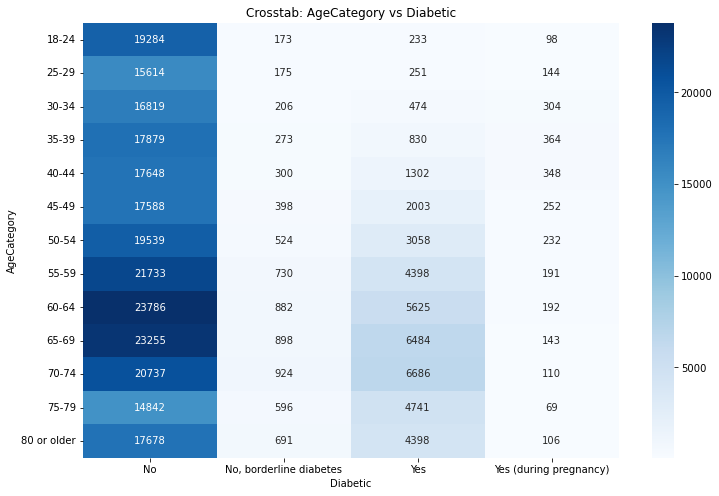

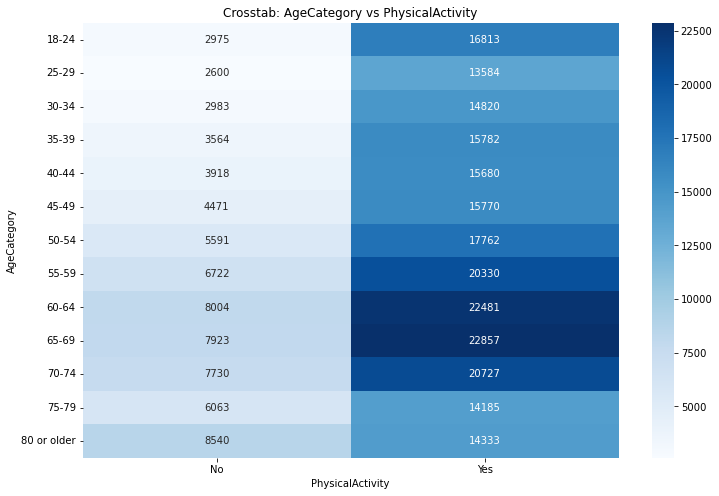

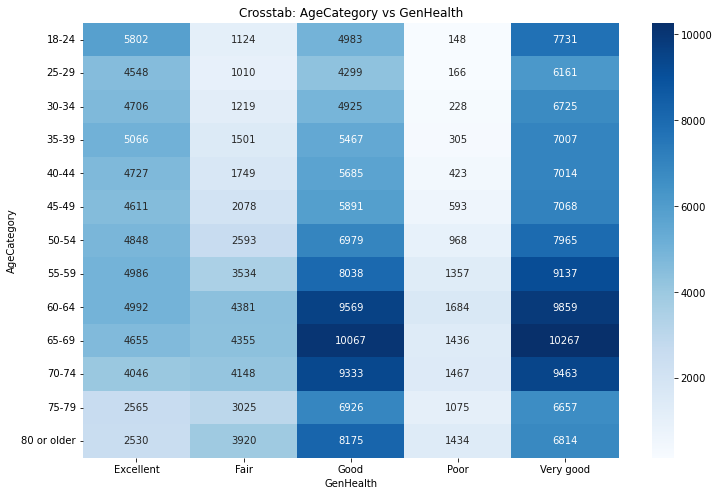

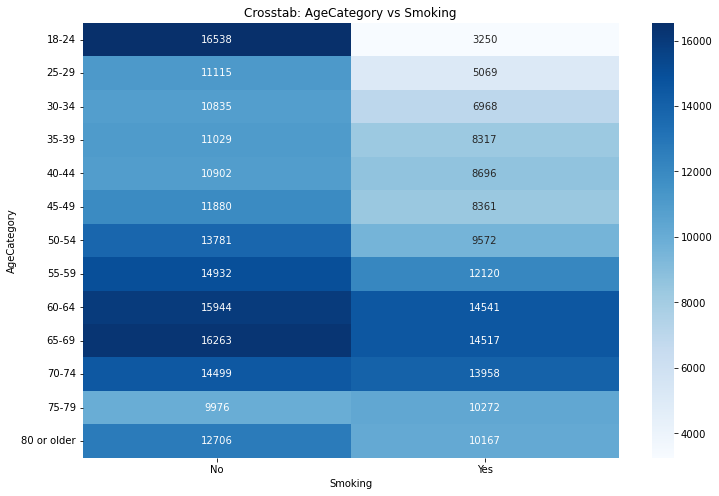

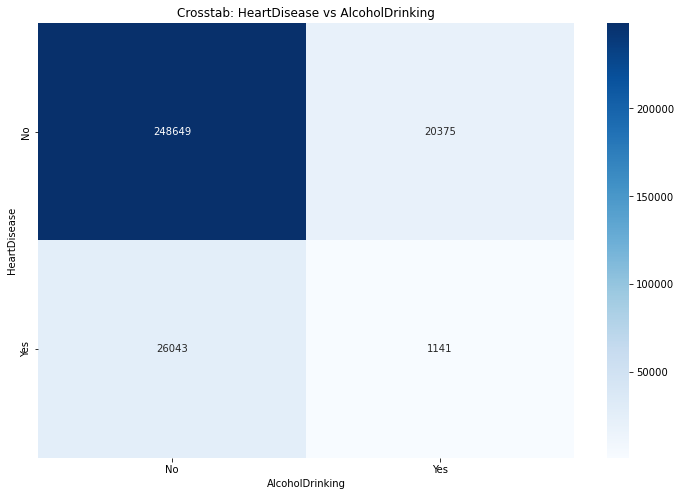

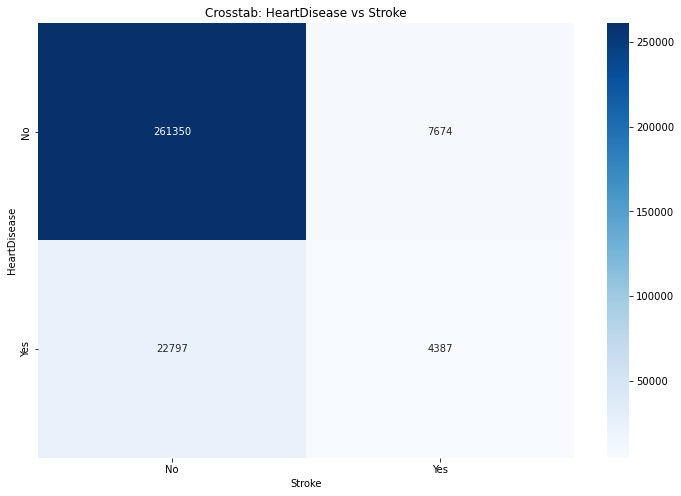

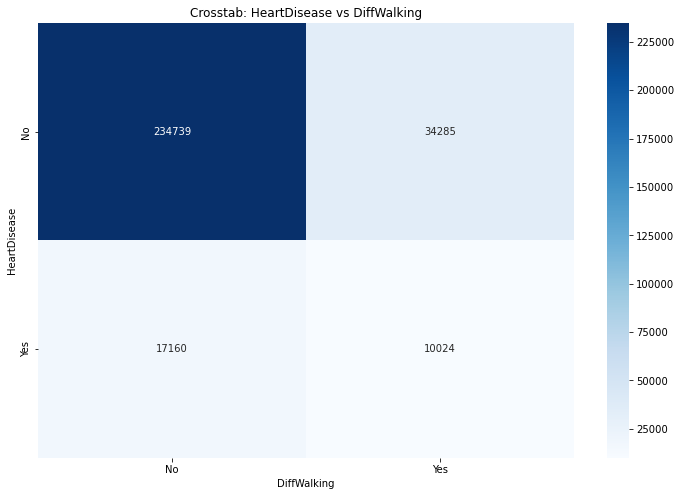

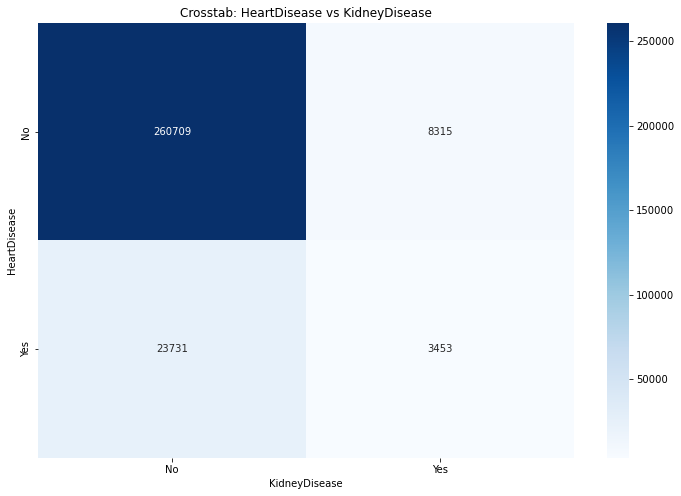

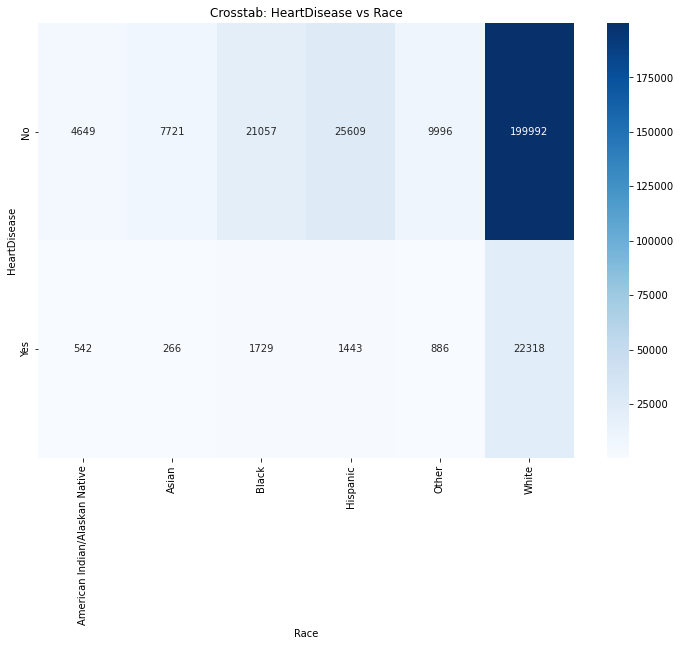

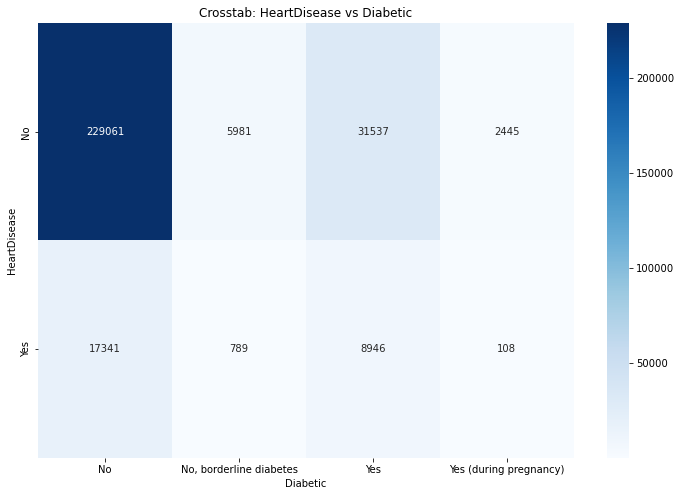

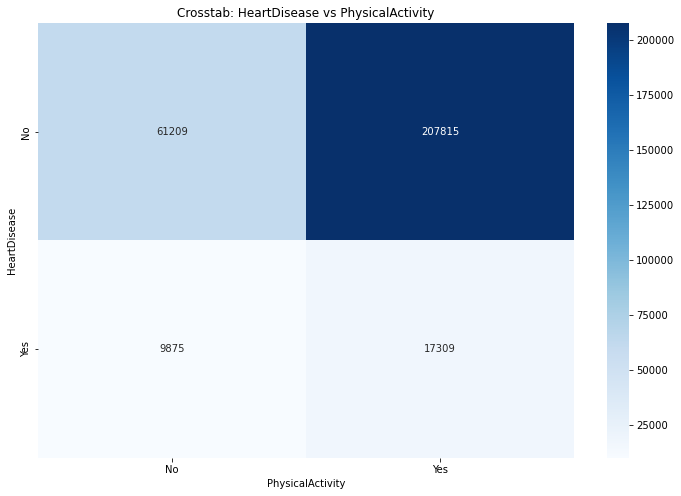

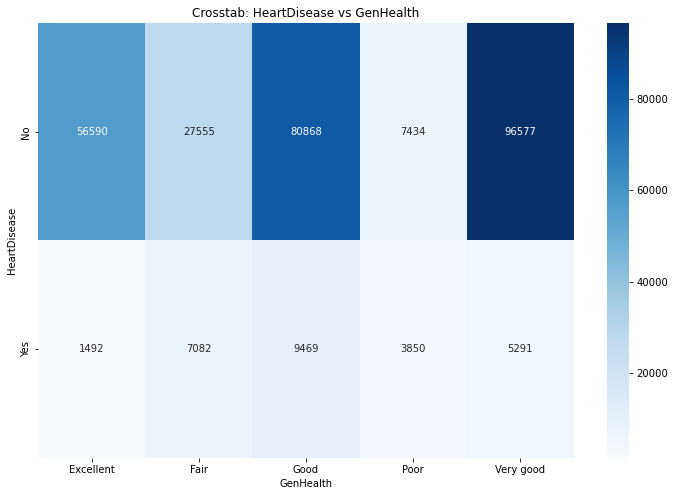

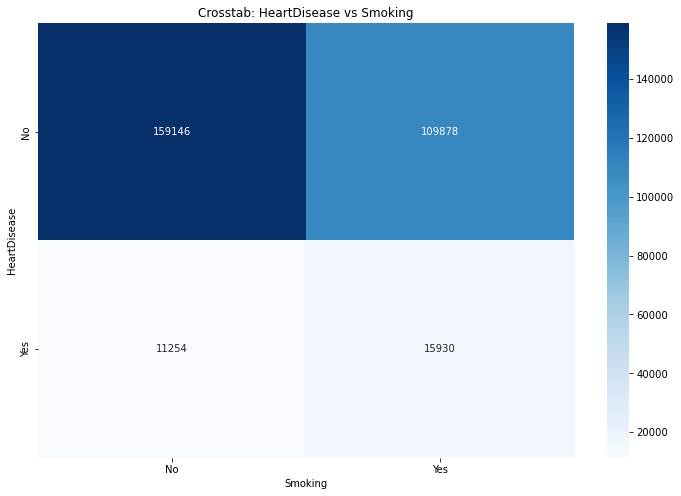

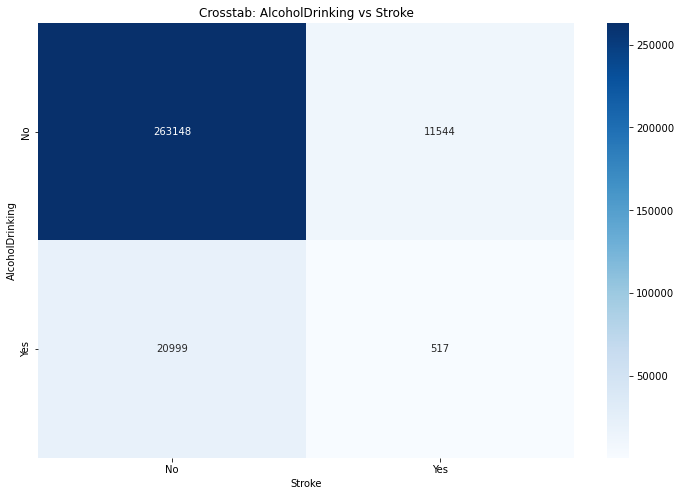

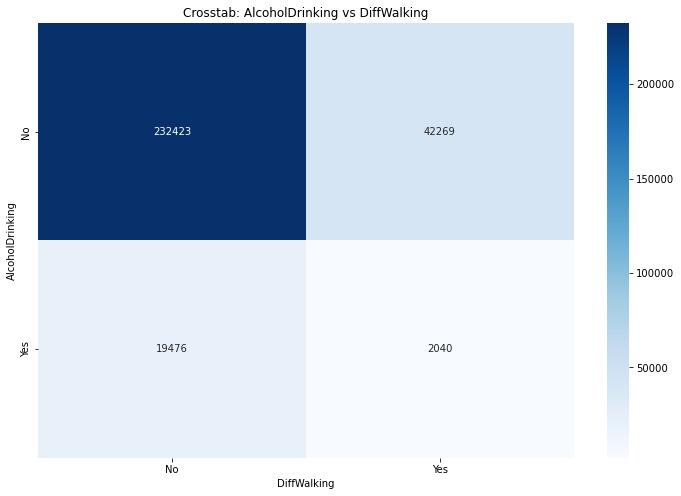

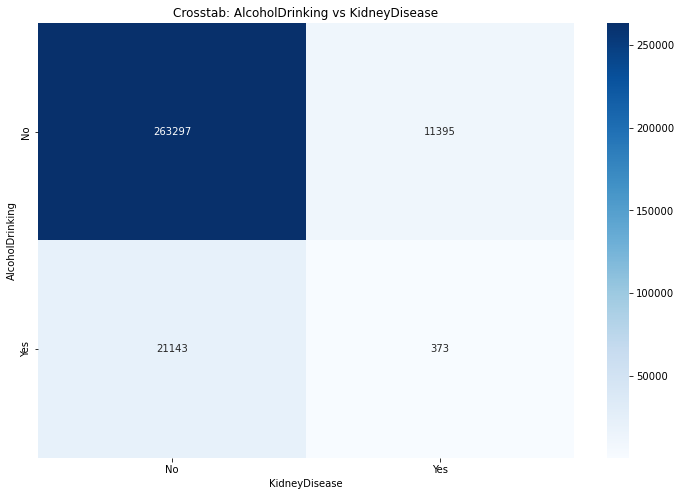

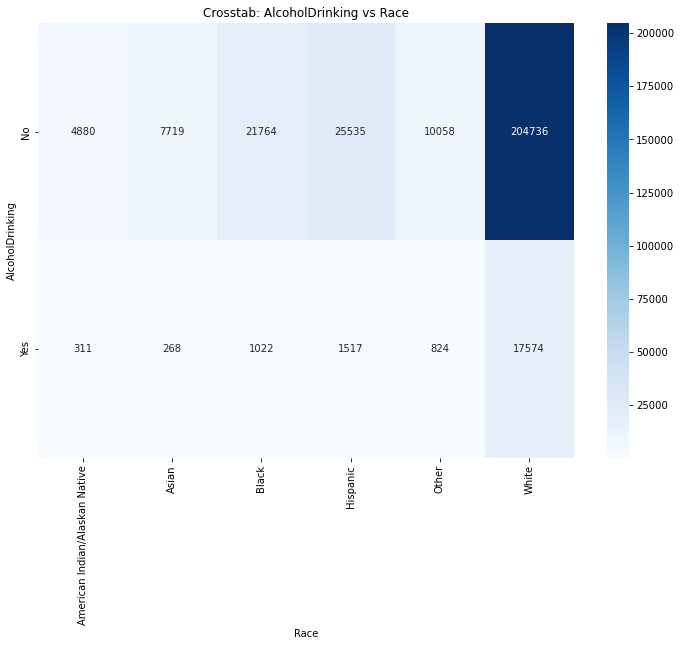

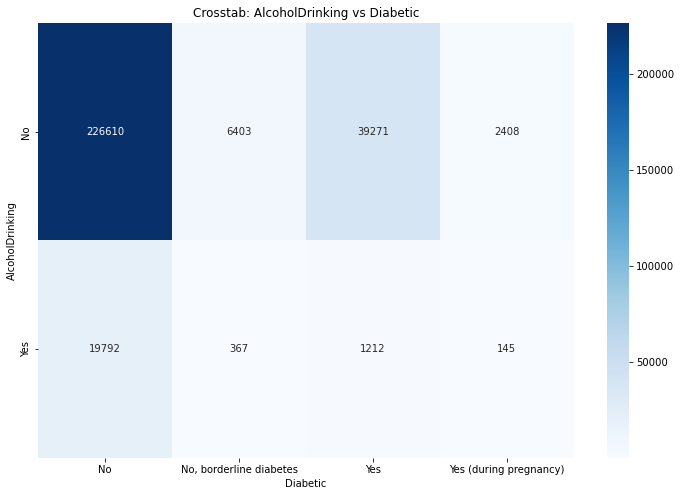

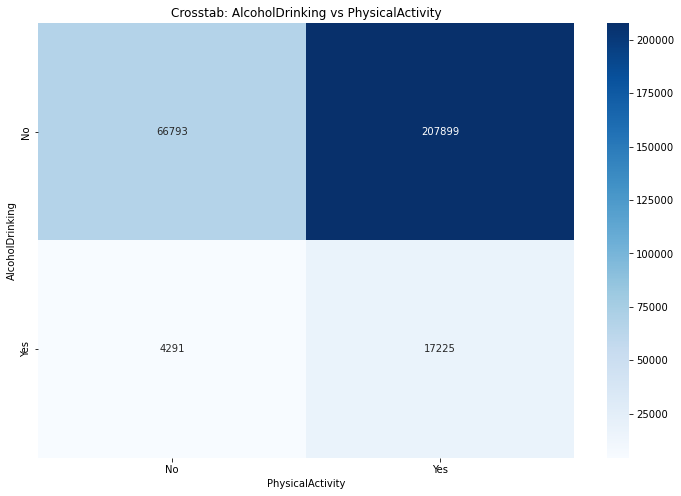

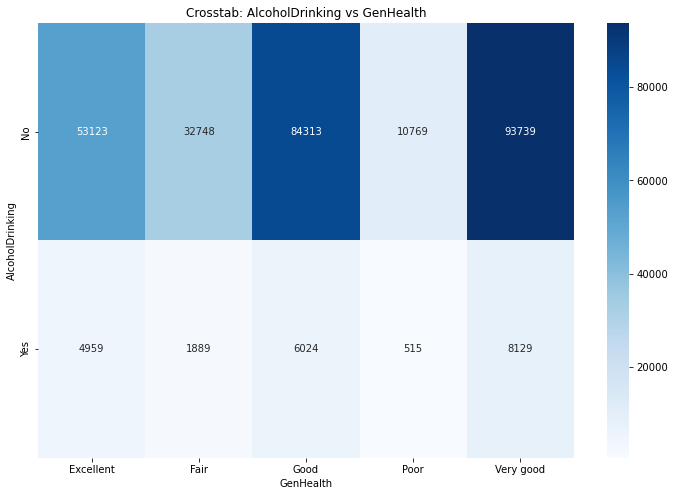

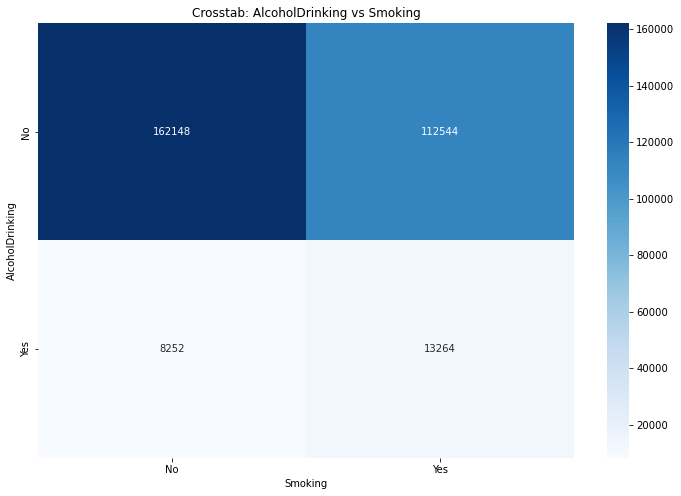

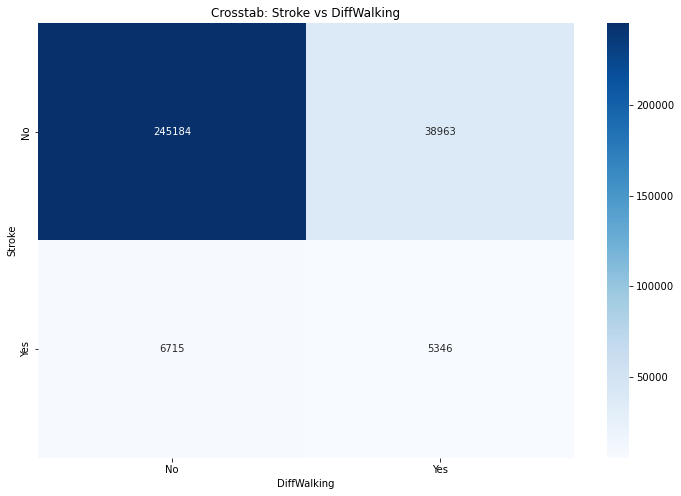

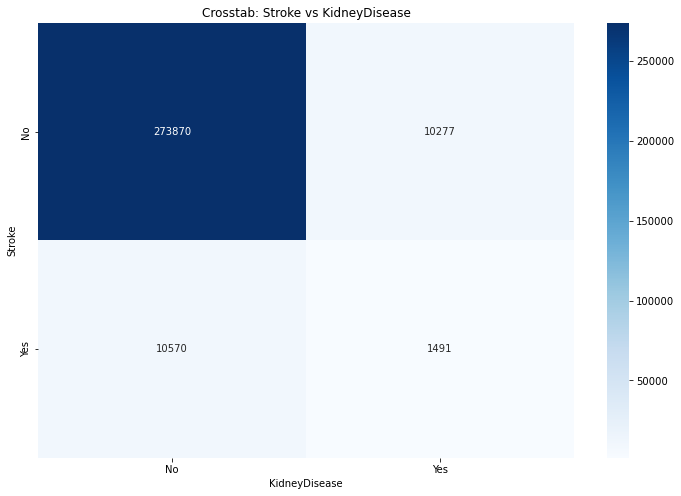

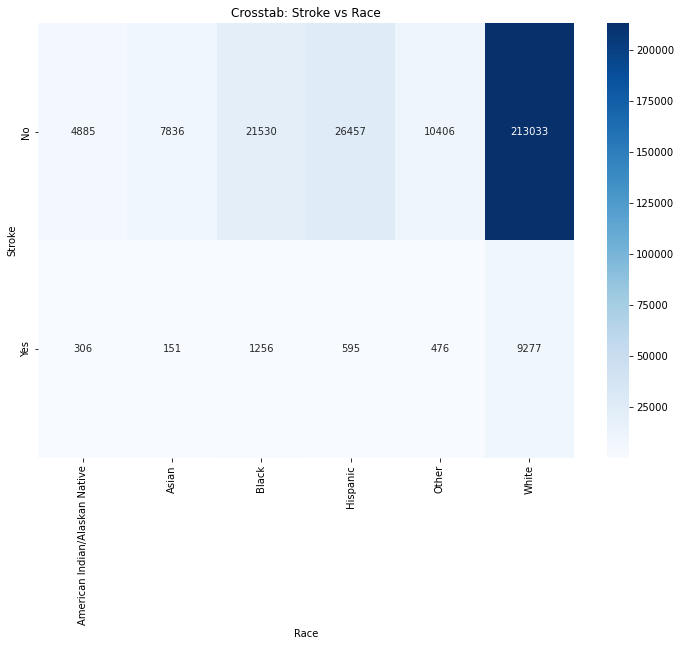

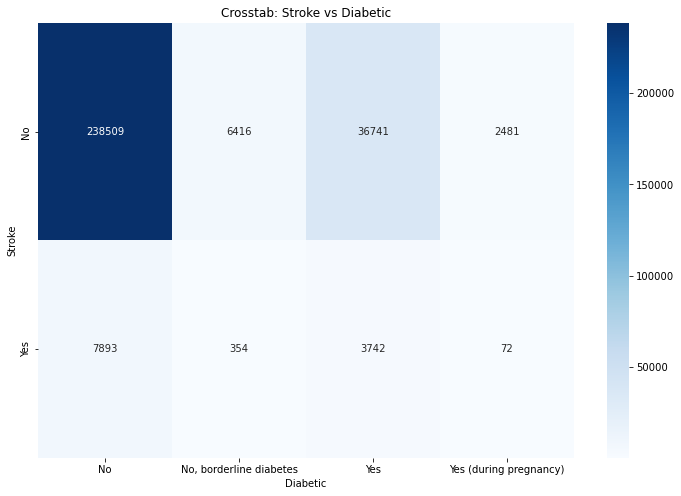

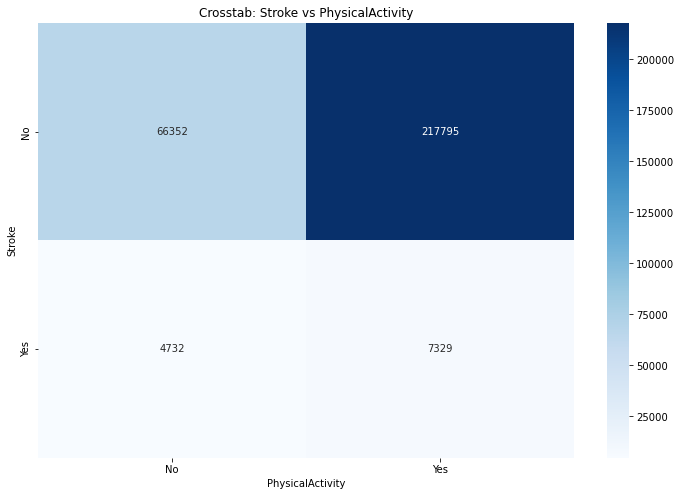

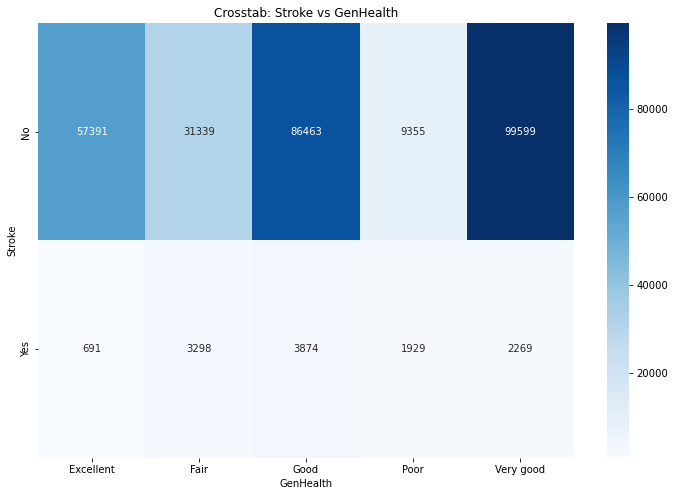

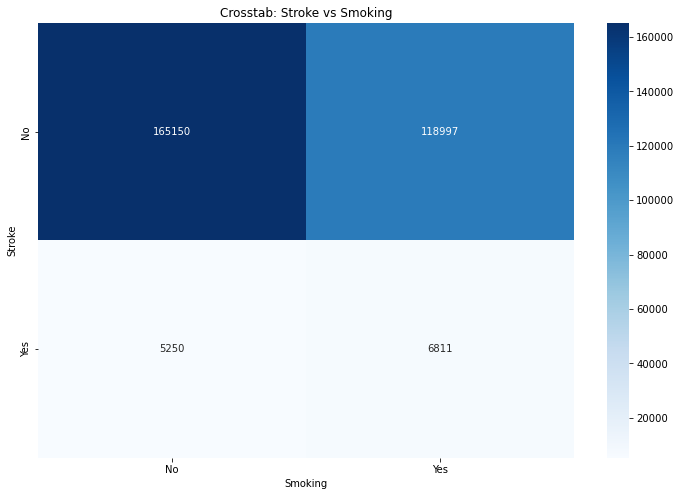

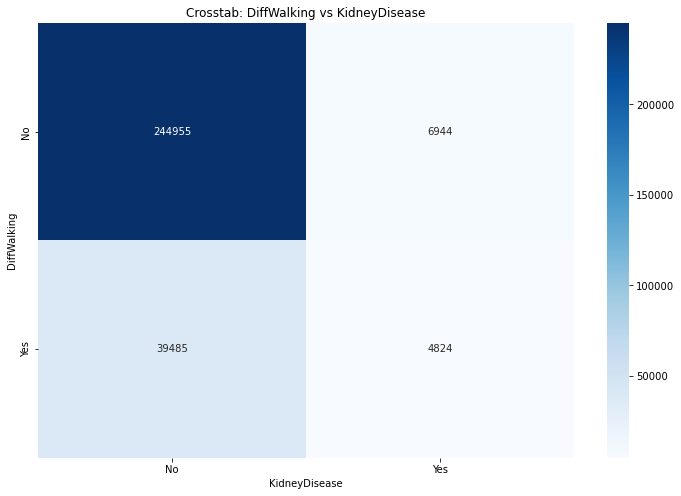

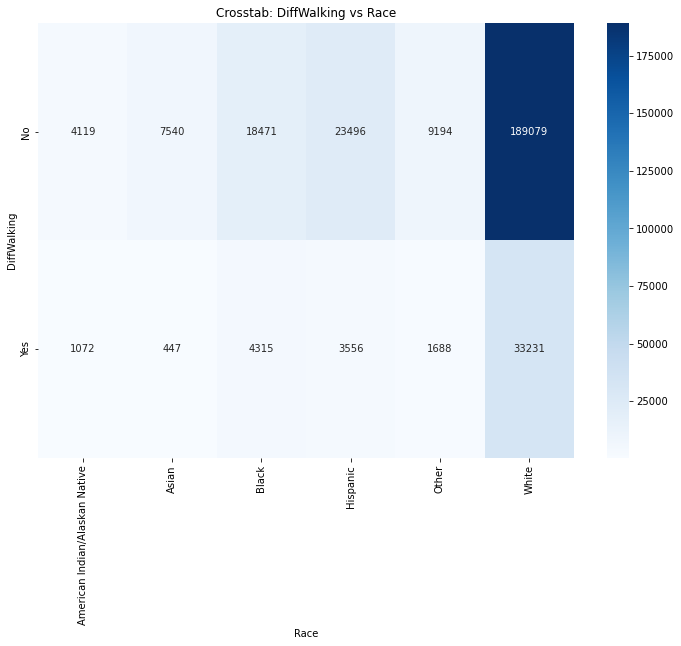

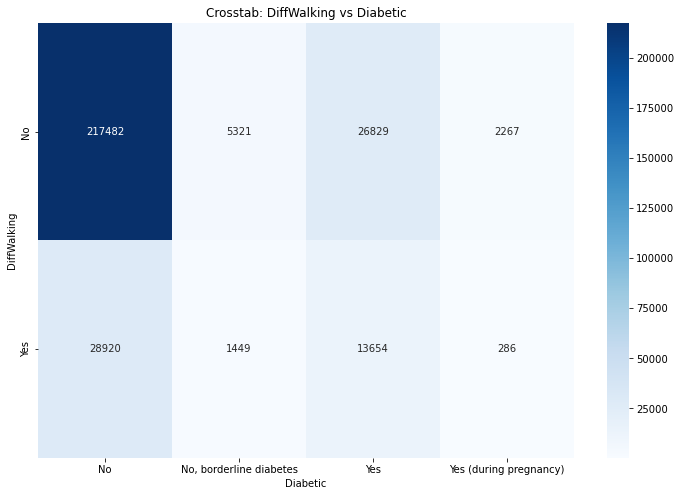

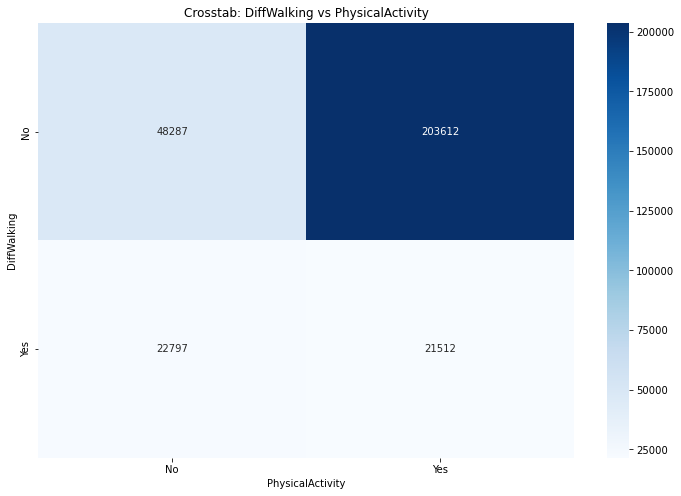

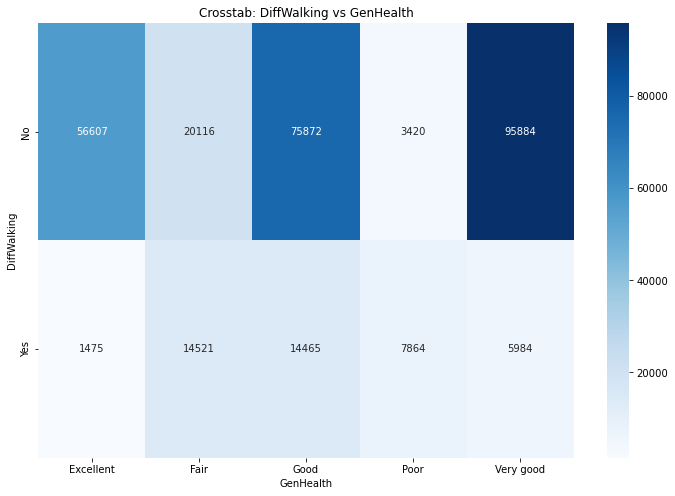

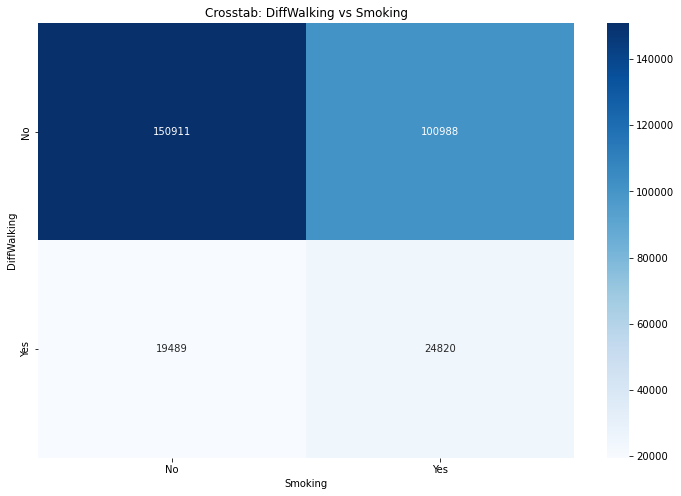

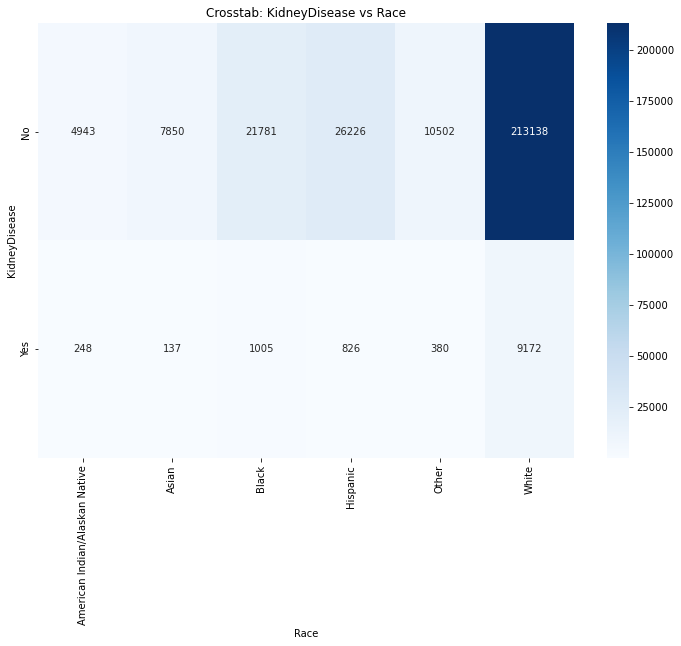

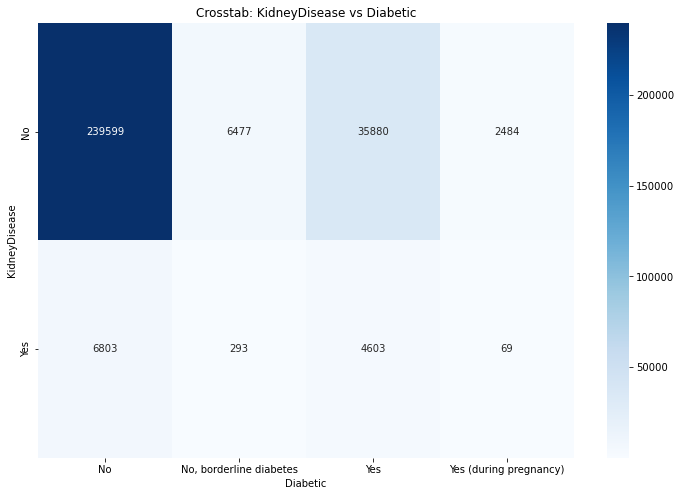

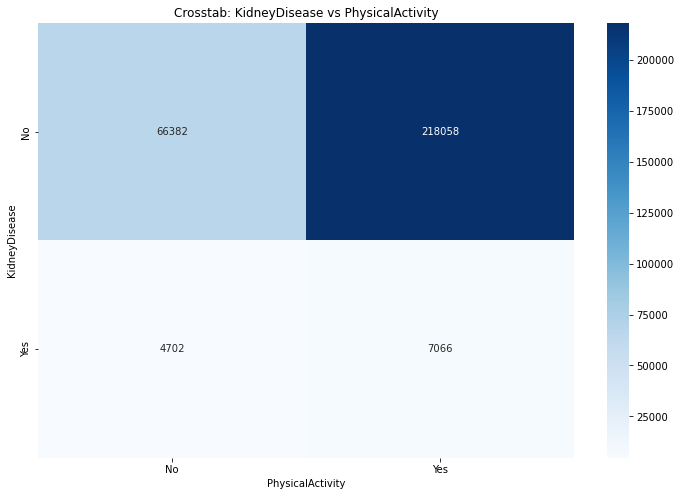

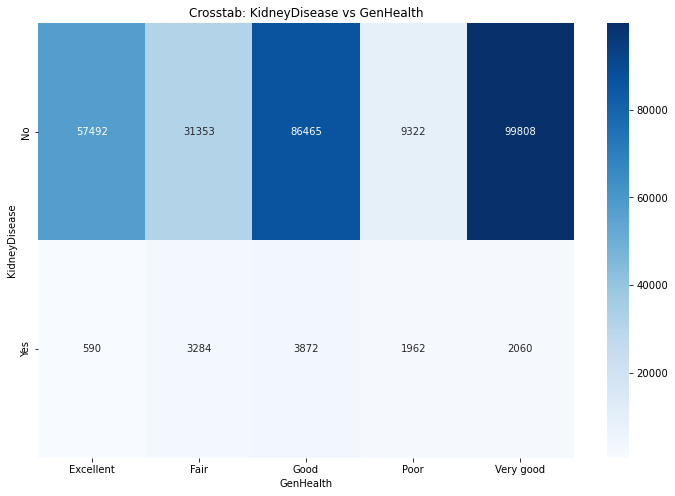

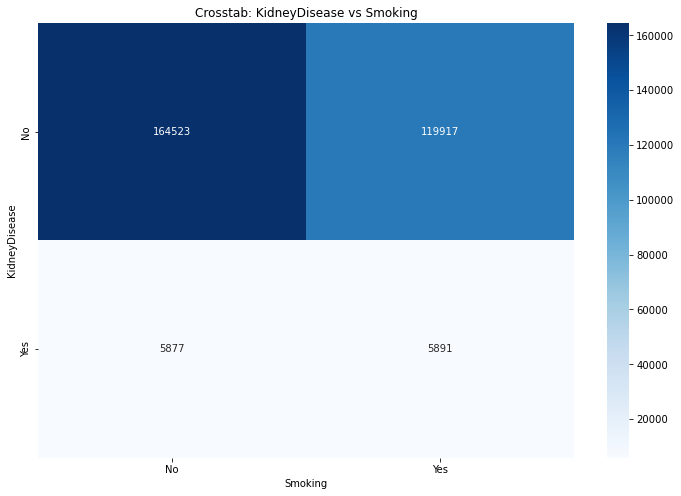

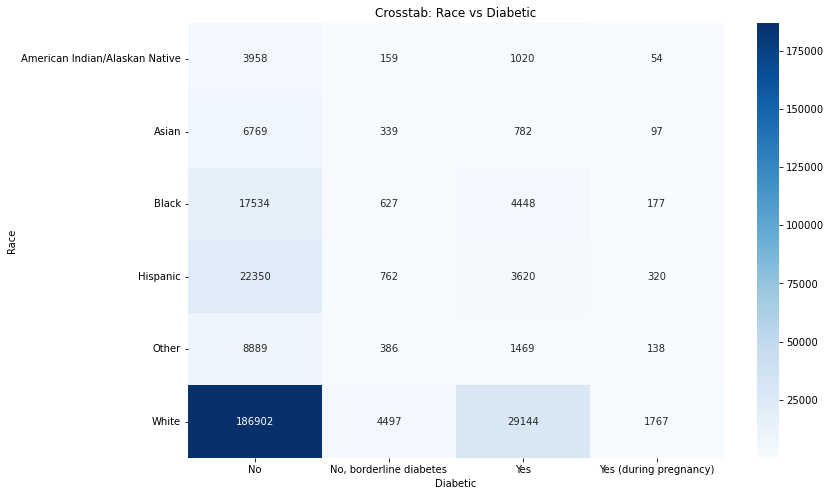

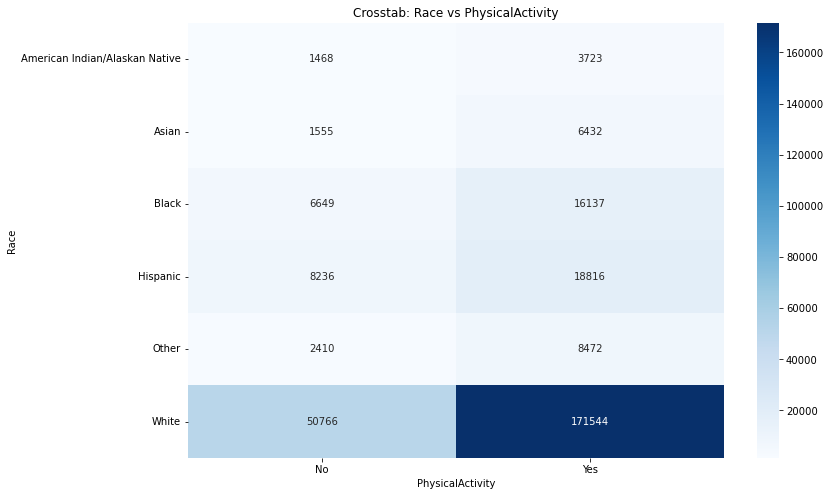

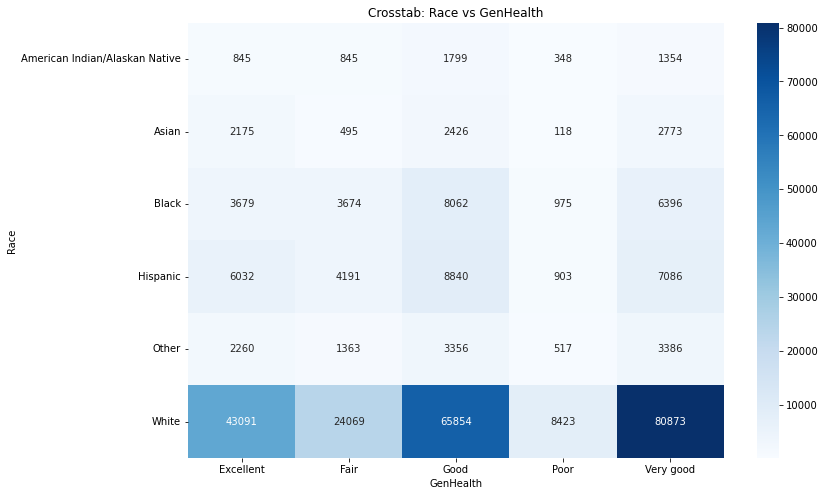

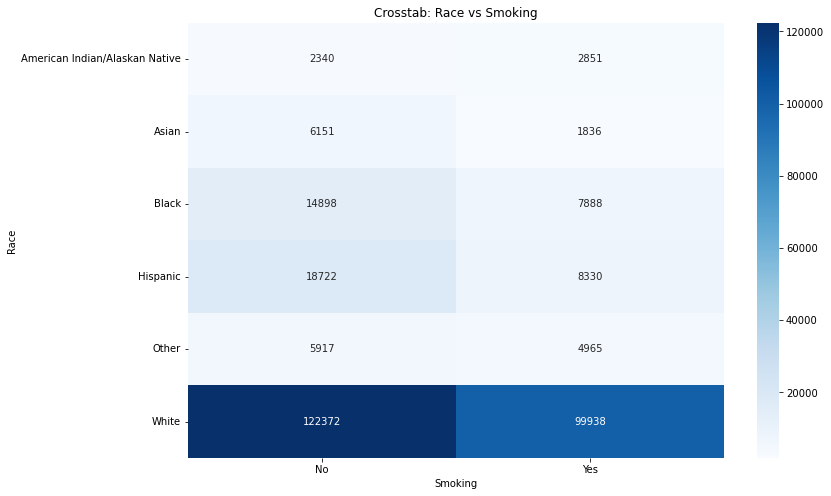

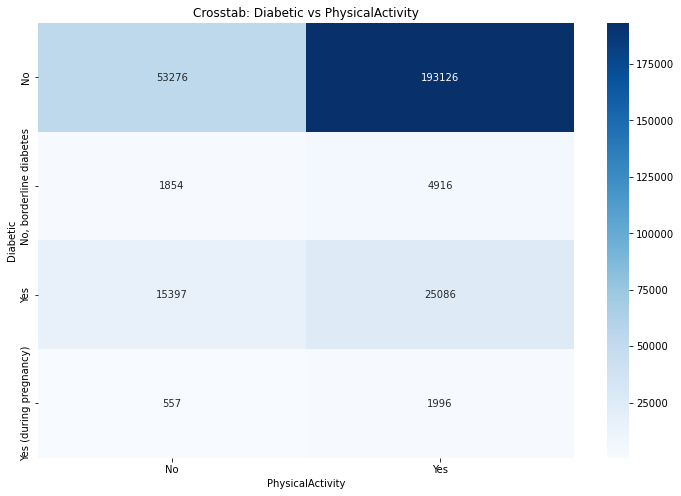

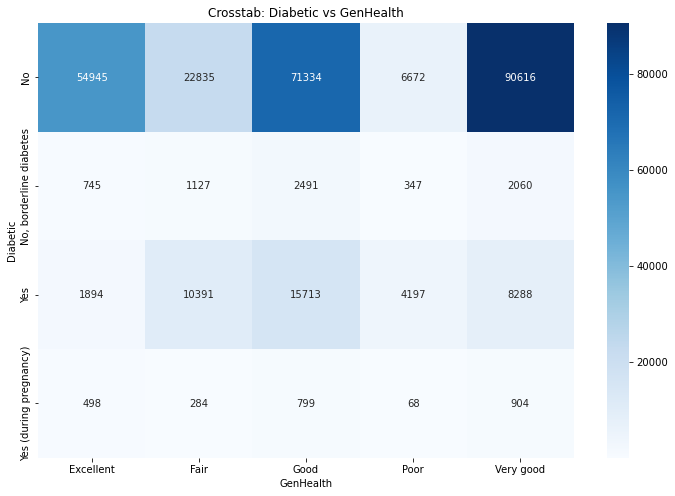

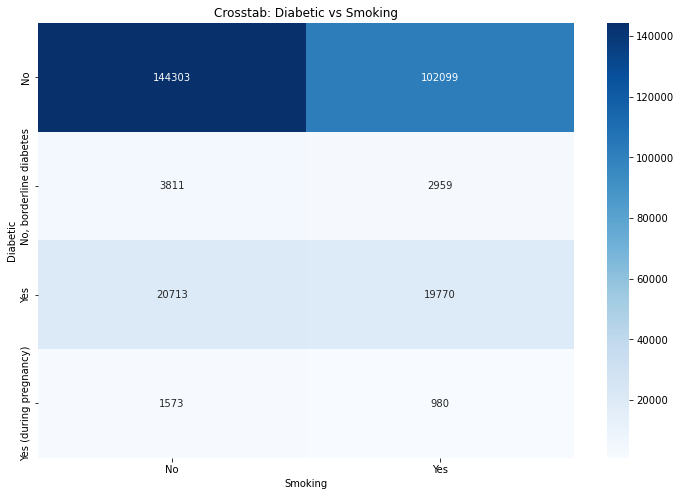

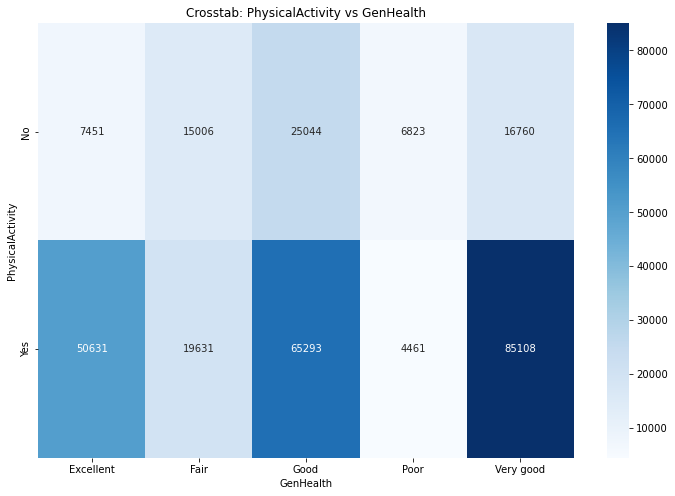

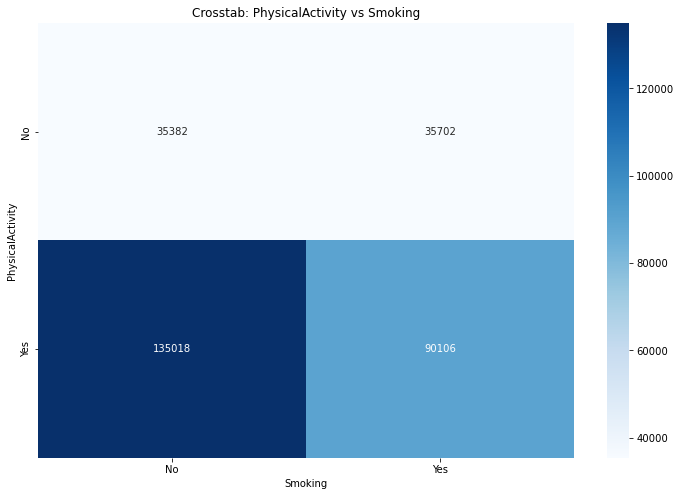

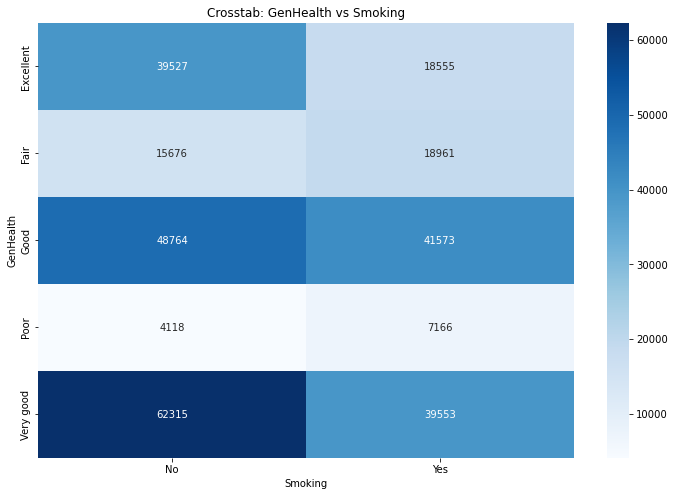

In [26]:
for i in range(len(cat_col_1)):
    for j in range(i + 1, len(cat_col_1)):
        crosstab = pd.crosstab(df[cat_col_1[i]], df[cat_col_1[j]])
        plt.figure(figsize=(12, 8))
        sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Crosstab: {cat_col_1[i]} vs {cat_col_1[j]}')
        plt.show()

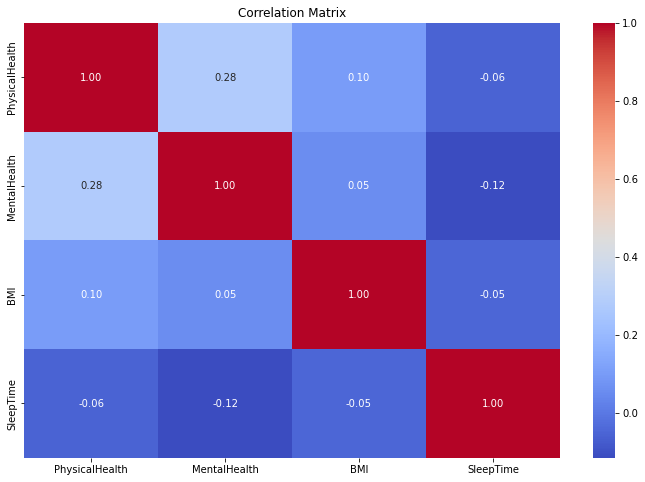

In [27]:
corr = df[num_col_1].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Key Obervation 7:-Self Explnatory**

In [29]:
df1=df.copy()  
df1

Sex  AgeCategory HeartDisease AlcoholDrinking Stroke  \
0       Female        55-59           No              No     No   
1       Female  80 or older           No              No    Yes   
2         Male        65-69           No              No     No   
3       Female        75-79           No              No     No   
4       Female        40-44           No              No     No   
...        ...          ...          ...             ...    ...   
319790    Male        60-64          Yes              No     No   
319791    Male        35-39           No              No     No   
319792  Female        45-49           No              No     No   
319793  Female        25-29           No              No     No   
319794  Female  80 or older           No              No     No   

        PhysicalHealth  MentalHealth DiffWalking    BMI KidneyDisease  \
0                    3            30          No  16.60            No   
1                    0             0          No  20.34            No   
2                   20            30          No  26.58            No   
3                    0             0          No  24.21            No   
4                   28             0         Yes  23.71            No   
...                ...           ...         ...    ...           ...   
319790               7             0         Yes  27.41            No   
319791               0             0          No  29.84            No   
319792               0             0          No  24.24            No   
319793               0             0          No  32.81            No   
319794               0             0          No  46.56            No   

            Race Diabetic PhysicalActivity  GenHealth  SleepTime Smoking  
0          White      Yes              Yes  Very good          5     Yes  
1          White       No              Yes  Very good          7      No  
2          White      Yes              Yes       Fair          8     Yes  
3          White       No               No       Good          6      No  
4          White       No              Yes  Very good          8      No  
...          ...      ...              ...        ...        ...     ...  
319790  Hispanic      Yes               No       Fair          6     Yes  
319791  Hispanic       No              Yes  Very good          5     Yes  
319792  Hispanic       No              Yes       Good          6      No  
319793  Hispanic       No               No       Good         12      No  
319794  Hispanic       No              Yes       Good          8      No  

[296208 rows x 16 columns]

# Replacing range of ages into numerical values (Categorical col)

In [30]:
age_mapping = {  
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80 or older': 12
}

df1['AgeCategory'] = df1['AgeCategory'].map(age_mapping) 

In [33]:
df1['Diabetic'].value_counts()

No                         246402
Yes                         40483
No, borderline diabetes      6770
Yes (during pregnancy)       2553
Name: Diabetic, dtype: int64

# Replacing-  " No, borderline diabetes"  with "NO"       and        "Yes (during pregnancy)" with   'Yes'

In [35]:
df1["Diabetic"] = df1["Diabetic"].replace({
    "No, borderline diabetes": "No",
    "Yes (during pregnancy)": "Yes"
})

In [36]:
df1['Diabetic'].value_counts()

No     253172
Yes     43036
Name: Diabetic, dtype: int64

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

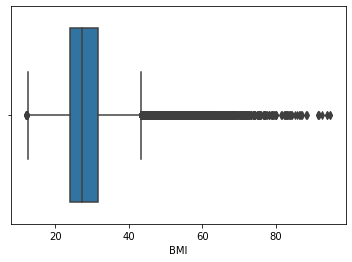

In [40]:
sns.boxplot(df1['BMI'])

In [43]:
df1[df1['BMI']>60]

Sex  AgeCategory HeartDisease AlcoholDrinking Stroke  \
561     Female            6           No              No     No   
2359    Female           10           No              No     No   
3094      Male            5           No             Yes     No   
3143    Female            6           No              No     No   
4084    Female            2           No              No     No   
...        ...          ...          ...             ...    ...   
313317    Male            7           No              No     No   
315162  Female            4           No              No     No   
317263  Female            9           No              No     No   
318792  Female            9           No              No     No   
319590    Male            4           No              No     No   

        PhysicalHealth  MentalHealth DiffWalking    BMI KidneyDisease  \
561                  0             0          No  75.82           Yes   
2359                 0             0         Yes  66.56            No   
3094                 0             0          No  62.65            No   
3143                20             0         Yes  66.18            No   
4084                25            15         Yes  60.46            No   
...                ...           ...         ...    ...           ...   
313317               0             0          No  60.54            No   
315162               0             0          No  60.82            No   
317263              30            30         Yes  62.00            No   
318792               0             0         Yes  60.19            No   
319590               0             0         Yes  62.42            No   

            Race Diabetic PhysicalActivity  GenHealth  SleepTime Smoking  
561        White       No              Yes       Good          8      No  
2359       Black       No               No       Fair          9     Yes  
3094       White       No              Yes       Good          7     Yes  
3143       Black      Yes               No       Poor         12      No  
4084       White       No               No       Poor          6      No  
...          ...      ...              ...        ...        ...     ...  
313317     White       No               No       Good          3      No  
315162     Other       No               No  Excellent          8      No  
317263  Hispanic       No               No       Fair          6      No  
318792  Hispanic       No              Yes       Fair          5      No  
319590  Hispanic       No               No       Good          7      No  

[492 rows x 16 columns]

# Handling outliers-considering BMI >60 is outlier

In [46]:
df1=df1[df1['BMI']<60]  # Removed rows having BMI data >60 

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

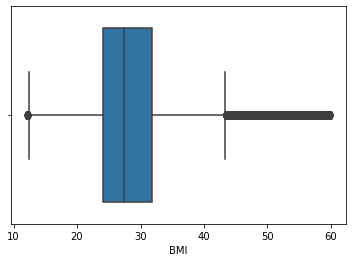

In [47]:
sns.boxplot(df1['BMI'])

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


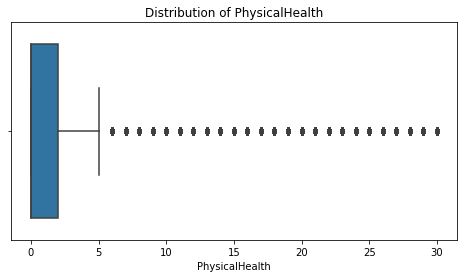

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


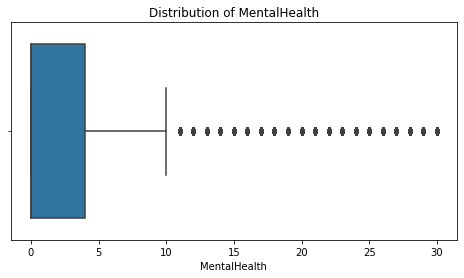

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


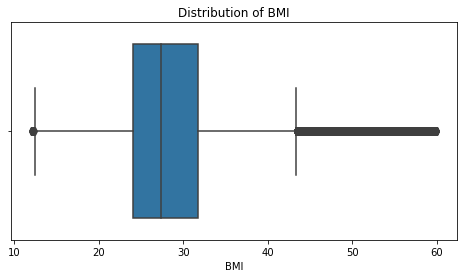

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


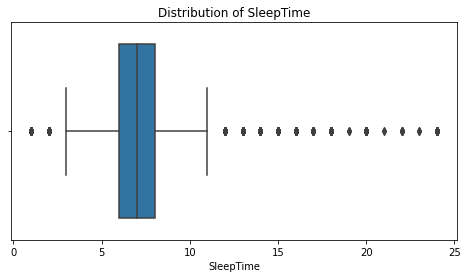

In [49]:
for col in num_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df1[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

# Splitting data into X & y

In [53]:
X=df1.drop(columns='Stroke')
y=df1['Stroke']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=43)

In [55]:
X_train


Sex  AgeCategory HeartDisease AlcoholDrinking  PhysicalHealth  \
143497  Female            9          Yes              No               0   
121853  Female            8           No              No               0   
278888    Male            8           No              No               0   
120833  Female            7           No              No               0   
261322  Female           12           No              No               4   
...        ...          ...          ...             ...             ...   
58739   Female            7          Yes              No               0   
41369   Female            3           No              No               0   
265914    Male            3           No              No               0   
158077    Male            7          Yes              No               0   
298228    Male           11           No              No               0   

        MentalHealth DiffWalking    BMI KidneyDisease      Race Diabetic  \
143497             0          No  41.20           Yes     White      Yes   
121853             0          No  28.89            No     White       No   
278888             0          No  31.93            No     White       No   
120833             3          No  33.29            No     Black       No   
261322             1         Yes  20.63            No     White       No   
...              ...         ...    ...           ...       ...      ...   
58739              0          No  25.85            No     Black       No   
41369              0          No  32.49            No     Black      Yes   
265914             0          No  27.37            No  Hispanic       No   
158077             0          No  26.63            No     White      Yes   
298228             0          No  30.67            No     White       No   

       PhysicalActivity  GenHealth  SleepTime Smoking  
143497              Yes       Good          8      No  
121853              Yes  Excellent          9     Yes  
278888              Yes  Very good          6     Yes  
120833              Yes       Good          8      No  
261322              Yes  Very good          7      No  
...                 ...        ...        ...     ...  
58739               Yes       Good          5      No  
41369               Yes       Good          7      No  
265914              Yes       Good          8      No  
158077              Yes  Very good          6     Yes  
298228              Yes  Very good          8      No  

[236572 rows x 15 columns]

In [57]:
df1['Stroke'].value_counts()   

No     283682
Yes     12034
Name: Stroke, dtype: int64

# As you can see that the target feature(Stroke) is highly imbalance , so we need to balance the minority class (Yes). we will try to balance the minority class with oversampling method by using 2 ways - 1. Random Oversampling  2. SMOTE (Synthetic Minority Oversampling Technique).

# Method 1-  Random Oversampling: Randomly duplicates existing samples from the minority class.

In [59]:
train_df = pd.concat([X_train, y_train], axis=1)

In [60]:
y_train.value_counts()

No     226978
Yes      9594
Name: Stroke, dtype: int64

In [61]:
train_df

Sex  AgeCategory HeartDisease AlcoholDrinking  PhysicalHealth  \
143497  Female            9          Yes              No               0   
121853  Female            8           No              No               0   
278888    Male            8           No              No               0   
120833  Female            7           No              No               0   
261322  Female           12           No              No               4   
...        ...          ...          ...             ...             ...   
58739   Female            7          Yes              No               0   
41369   Female            3           No              No               0   
265914    Male            3           No              No               0   
158077    Male            7          Yes              No               0   
298228    Male           11           No              No               0   

        MentalHealth DiffWalking    BMI KidneyDisease      Race Diabetic  \
143497             0          No  41.20           Yes     White      Yes   
121853             0          No  28.89            No     White       No   
278888             0          No  31.93            No     White       No   
120833             3          No  33.29            No     Black       No   
261322             1         Yes  20.63            No     White       No   
...              ...         ...    ...           ...       ...      ...   
58739              0          No  25.85            No     Black       No   
41369              0          No  32.49            No     Black      Yes   
265914             0          No  27.37            No  Hispanic       No   
158077             0          No  26.63            No     White      Yes   
298228             0          No  30.67            No     White       No   

       PhysicalActivity  GenHealth  SleepTime Smoking Stroke  
143497              Yes       Good          8      No     No  
121853              Yes  Excellent          9     Yes     No  
278888              Yes  Very good          6     Yes     No  
120833              Yes       Good          8      No     No  
261322              Yes  Very good          7      No     No  
...                 ...        ...        ...     ...    ...  
58739               Yes       Good          5      No     No  
41369               Yes       Good          7      No     No  
265914              Yes       Good          8      No     No  
158077              Yes  Very good          6     Yes     No  
298228              Yes  Very good          8      No     No  

[236572 rows x 16 columns]

In [62]:
majority_class = train_df[train_df["Stroke"] == 'No']
minority_class = train_df[train_df["Stroke"] == 'Yes']

In [63]:
train_df.shape

(236572, 16)

In [64]:
from sklearn.utils import resample

In [65]:
minority_upsampled = resample(
    minority_class,
    replace=True,
    n_samples=len(majority_class),  # Match the majority class size
    random_state=42
)

# Step 5: Combine the upsampled data
upsampled_train_df = pd.concat([majority_class, minority_upsampled])

# Step 6: Separate X_train and y_train after upsampling
X_train_upsampled = upsampled_train_df.drop("Stroke", axis=1)
y_train_upsampled = upsampled_train_df["Stroke"]

# Step 7: Verify class distribution
print("Original y_train distribution:")
print(y_train.value_counts())

print("\nUpsampled y_train distribution:")
print(y_train_upsampled.value_counts())

Original y_train distribution:
No     226978
Yes      9594
Name: Stroke, dtype: int64

Upsampled y_train distribution:
No     226978
Yes    226978
Name: Stroke, dtype: int64


In [66]:
X_train_upsampled.shape

(453956, 15)

In [67]:
y_train_upsampled.shape

(453956,)

In [68]:
X_train_upsampled

Sex  AgeCategory HeartDisease AlcoholDrinking  PhysicalHealth  \
143497  Female            9          Yes              No               0   
121853  Female            8           No              No               0   
278888    Male            8           No              No               0   
120833  Female            7           No              No               0   
261322  Female           12           No              No               4   
...        ...          ...          ...             ...             ...   
62630   Female            7           No              No              30   
46193   Female            8           No              No              30   
214035    Male            2          Yes              No              30   
117493  Female           11           No              No               0   
159334  Female           12           No              No               0   

        MentalHealth DiffWalking    BMI KidneyDisease   Race Diabetic  \
143497             0          No  41.20           Yes  White      Yes   
121853             0          No  28.89            No  White       No   
278888             0          No  31.93            No  White       No   
120833             3          No  33.29            No  Black       No   
261322             1         Yes  20.63            No  White       No   
...              ...         ...    ...           ...    ...      ...   
62630              5         Yes  43.84            No  Other      Yes   
46193             25         Yes  33.84            No  White       No   
214035            30          No  33.72            No  Black       No   
117493             0          No  30.47            No  White       No   
159334             2          No  25.75            No  White       No   

       PhysicalActivity  GenHealth  SleepTime Smoking  
143497              Yes       Good          8      No  
121853              Yes  Excellent          9     Yes  
278888              Yes  Very good          6     Yes  
120833              Yes       Good          8      No  
261322              Yes  Very good          7      No  
...                 ...        ...        ...     ...  
62630               Yes  Very good          8      No  
46193                No       Poor          5     Yes  
214035              Yes       Fair          6     Yes  
117493              Yes  Very good          7     Yes  
159334               No  Very good          8      No  

[453956 rows x 15 columns]

In [69]:
X_train.shape

(236572, 15)

In [70]:
for i in num_col:
    print(i,"==",num_col[i].skew().round(2))
    num_col[i].skew()

PhysicalHealth == 2.47
MentalHealth == 2.21
BMI == 1.29
SleepTime == 0.7


# Log transformation needs to be applied on Physical heath, mental health & BMI as data in these features are right skewed

In [71]:
# Log Transformation  (if the data is positive & rightly skewed)
X_train_upsampled['PhysicalHealth'] = np.log(df['PhysicalHealth'] + 1)  # Adding 1 to avoid log(0)
X_train_upsampled['MentalHealth'] = np.log(df['MentalHealth'] + 1)
X_train_upsampled['BMI'] = np.log(df['BMI'] + 1)
X_test['PhysicalHealth'] = np.log(df['PhysicalHealth'] + 1)  # Adding 1 to avoid log(0)
X_test['MentalHealth'] = np.log(df['MentalHealth'] + 1)
X_test['BMI'] = np.log(df['BMI'] + 1)

In [72]:
X_train_upsampled['PhysicalHealth'].skew()

0.8778059069773326

In [73]:
X_train_upsampled['MentalHealth'].skew()

0.9987694810284659

In [74]:
X_train_upsampled['BMI'].skew()

0.27177069077963534

# Scaling needs to be done on all Numercial features as mentioned below 

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_upsampled[['PhysicalHealth', 'MentalHealth', 'BMI']] = scaler.fit_transform(X_train_upsampled[['PhysicalHealth', 'MentalHealth', 'BMI']])
X_test[['PhysicalHealth', 'MentalHealth', 'BMI']] = scaler.transform(X_test[['PhysicalHealth', 'MentalHealth', 'BMI']])

In [76]:
X_train_upsampled['SleepTime'] = scaler.fit_transform(X_train_upsampled[['SleepTime']])
X_test['SleepTime'] = scaler.transform(X_test[['SleepTime']])

# Applying Ordinal Encoder and one hot encoder through column transformer.

1. Ordinal encoding is done when some order is present in feature
2. One hot encoder is done to convert categorical feature into numercial faeture

In [78]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [79]:
# Applying Column transformer fucntion

transformer = ColumnTransformer(transformers=[
    ('tnf1',OrdinalEncoder(categories=[['Excellent','Very good','Good','Fair','Poor']]),['GenHealth']),
    ('tnf2',OneHotEncoder(sparse=False,drop='first'),['Sex','HeartDisease','AlcoholDrinking','DiffWalking','KidneyDisease','Race','PhysicalActivity','Diabetic','Smoking'])
],remainder='passthrough')

In [80]:
X_train_new=transformer.fit_transform(X_train_upsampled)
X_train_new

array([[ 2.        ,  0.        ,  1.        , ..., -0.71179592,
         1.8197648 ,  0.4940033 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.71179592,
         0.14385572,  1.06328005],
       [ 1.        ,  1.        ,  0.        , ..., -0.71179592,
         0.61451539, -0.64455021],
       ...,
       [ 3.        ,  1.        ,  1.        , ...,  2.0671931 ,
         0.87171991, -0.64455021],
       [ 1.        ,  0.        ,  0.        , ..., -0.71179592,
         0.39415507, -0.07527346],
       [ 1.        ,  0.        ,  0.        , ...,  0.17726723,
        -0.39546101,  0.4940033 ]])

In [81]:
X_test_new=transformer.transform(X_test)

# Applying Label encoder on Target feature (Stroke) as it has a value in Yes & No

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
le = LabelEncoder()
le.fit(y_train_upsampled)

LabelEncoder()

In [84]:
y_train_new = le.transform(y_train_upsampled)
y_test_new = le.transform(y_test)

In [86]:
y_train_upsampled

143497     No
121853     No
278888     No
120833     No
261322     No
         ... 
62630     Yes
46193     Yes
214035    Yes
117493    Yes
159334    Yes
Name: Stroke, Length: 453956, dtype: object

In [87]:
y_train_new

array([0, 0, 0, ..., 1, 1, 1])

In [88]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report, confusion_matrix, roc_auc_score

# Assessing Result with multiple ML models 

LogisticRegression
----------


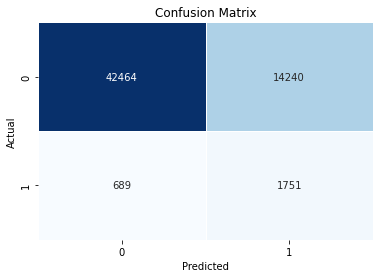

              precision    recall  f1-score   support

           0       0.98      0.75      0.85     56704
           1       0.11      0.72      0.19      2440

    accuracy                           0.75     59144
   macro avg       0.55      0.73      0.52     59144
weighted avg       0.95      0.75      0.82     59144

Decision Tree Classifier
----------


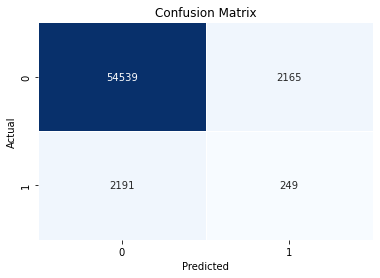

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     56704
           1       0.10      0.10      0.10      2440

    accuracy                           0.93     59144
   macro avg       0.53      0.53      0.53     59144
weighted avg       0.93      0.93      0.93     59144



C:\Users\mohit\anaconda3a\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors
----------


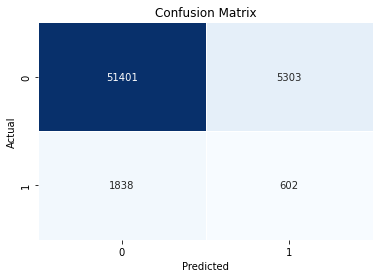

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     56704
           1       0.10      0.25      0.14      2440

    accuracy                           0.88     59144
   macro avg       0.53      0.58      0.54     59144
weighted avg       0.93      0.88      0.90     59144

Random Forest
----------


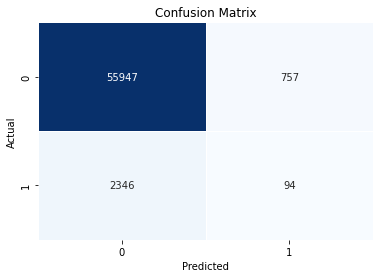

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     56704
           1       0.11      0.04      0.06      2440

    accuracy                           0.95     59144
   macro avg       0.54      0.51      0.52     59144
weighted avg       0.92      0.95      0.94     59144

GB
----------


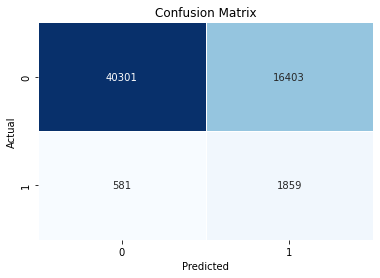

              precision    recall  f1-score   support

           0       0.99      0.71      0.83     56704
           1       0.10      0.76      0.18      2440

    accuracy                           0.71     59144
   macro avg       0.54      0.74      0.50     59144
weighted avg       0.95      0.71      0.80     59144



Model Accuracy Score Precision  Recall F1 Score ROC-AUC
0        LogisticRegression         74.76%    10.95%  71.76%    19.0%  81.12%
1  Decision Tree Classifier         92.63%    10.31%   10.2%   10.26%   53.2%
2       K-Nearest Neighbors         87.93%    10.19%  24.67%   14.43%  60.62%
3             Random Forest         94.75%    11.05%   3.85%    5.71%   75.4%
4                        GB         71.28%    10.18%  76.19%   17.96%  81.44%

In [89]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=200),
    'Decision Tree Classifier': DecisionTreeClassifier(splitter='best',random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=57),
    'GB': GradientBoostingClassifier()
}

results = []

for model_name, model in models.items():
    model.fit(X_train_new, y_train_new)  
    y_pred = model.predict(X_test_new)
    y_pred_prob = model.predict_proba(X_test_new)[:, 1]
    
    print(model_name)
    print("-"*10)
    
    confusion = confusion_matrix(y_test_new, y_pred)
    accuracy = round(accuracy_score(y_test_new, y_pred) * 100, 2)
    precision = round(precision_score(y_test_new, y_pred) * 100, 2)
    recall = round(recall_score(y_test_new, y_pred) * 100, 2)
    f1 = round(f1_score(y_test_new, y_pred) * 100, 2)
    roc = round(roc_auc_score(y_test_new, y_pred_prob) * 100, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(classification_report(y_test_new, y_pred))
    results.append({
        'Model': model_name,
        'Accuracy Score': f"{accuracy}%",
        'Precision': f"{precision}%",
        'Recall': f"{recall}%",
        'F1 Score': f"{f1}%",
        'ROC-AUC': f"{roc}%"
    })

results_df = pd.DataFrame(results)
display(results_df)

# As our primary objective is to accurately identify strokes, we should prioritize recall. 
Based on the metrics in the table, **Logistic Regression and Gradient Boosting perform better** overall, with a good balance of accuracy, recall, and ROC-AUC. In contrast, both the **Decision Tree and Random Forest models perform poorly** across all key metrics, indicating they may not be suitable for this task

# Method 2-  SMOTE (Synthetic Minority Oversampling Technique) -It generates synthetic samples by interpolating between existing samples in the minority class.

In [90]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [91]:
from imblearn.over_sampling import SMOTE

In [92]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2,y_test2=train_test_split(X,y, test_size=0.2,random_state=43)

In [93]:
X_train2

Sex  AgeCategory HeartDisease AlcoholDrinking  PhysicalHealth  \
143497  Female            9          Yes              No               0   
121853  Female            8           No              No               0   
278888    Male            8           No              No               0   
120833  Female            7           No              No               0   
261322  Female           12           No              No               4   
...        ...          ...          ...             ...             ...   
58739   Female            7          Yes              No               0   
41369   Female            3           No              No               0   
265914    Male            3           No              No               0   
158077    Male            7          Yes              No               0   
298228    Male           11           No              No               0   

        MentalHealth DiffWalking    BMI KidneyDisease      Race Diabetic  \
143497             0          No  41.20           Yes     White      Yes   
121853             0          No  28.89            No     White       No   
278888             0          No  31.93            No     White       No   
120833             3          No  33.29            No     Black       No   
261322             1         Yes  20.63            No     White       No   
...              ...         ...    ...           ...       ...      ...   
58739              0          No  25.85            No     Black       No   
41369              0          No  32.49            No     Black      Yes   
265914             0          No  27.37            No  Hispanic       No   
158077             0          No  26.63            No     White      Yes   
298228             0          No  30.67            No     White       No   

       PhysicalActivity  GenHealth  SleepTime Smoking  
143497              Yes       Good          8      No  
121853              Yes  Excellent          9     Yes  
278888              Yes  Very good          6     Yes  
120833              Yes       Good          8      No  
261322              Yes  Very good          7      No  
...                 ...        ...        ...     ...  
58739               Yes       Good          5      No  
41369               Yes       Good          7      No  
265914              Yes       Good          8      No  
158077              Yes  Very good          6     Yes  
298228              Yes  Very good          8      No  

[236572 rows x 15 columns]

# Log transformation needs to be applied on Physical heath, mental health & BMI as data in these features are right skewed

In [94]:
# Log Transformation  (if the data is positive & rightly skewed)
X_train2['PhysicalHealth'] = np.log(df['PhysicalHealth'] + 1)  # Adding 1 to avoid log(0)
X_train2['MentalHealth'] = np.log(df['MentalHealth'] + 1)
X_train2['BMI'] = np.log(df['BMI'] + 1)
X_test2['PhysicalHealth'] = np.log(df['PhysicalHealth'] + 1)  # Adding 1 to avoid log(0)
X_test2['MentalHealth'] = np.log(df['MentalHealth'] + 1)
X_test2['BMI'] = np.log(df['BMI'] + 1)

In [95]:
X_train2['PhysicalHealth'].skew()

1.477171647709941

In [96]:
X_train2['MentalHealth'].skew()

1.0963818292602816

In [97]:
X_train2['BMI'].skew()

0.3394856208964939

# Scaling needs to be done on all Numercial features as mentioned below¶

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train2[['PhysicalHealth', 'MentalHealth', 'BMI']] = scaler.fit_transform(X_train2[['PhysicalHealth', 'MentalHealth', 'BMI']])
X_test2[['PhysicalHealth', 'MentalHealth', 'BMI']] = scaler.transform(X_test2[['PhysicalHealth', 'MentalHealth', 'BMI']])

In [99]:
# Applying Column transformer fucntion

transformer2 = ColumnTransformer(transformers=[
    ('tnf1',OrdinalEncoder(categories=[['Excellent','Very good','Good','Fair','Poor']]),['GenHealth']),
    ('tnf2',OneHotEncoder(sparse=False,drop='first'),['Sex','HeartDisease','AlcoholDrinking','DiffWalking','KidneyDisease','Race','PhysicalActivity','Diabetic','Smoking'])
],remainder='passthrough')

In [100]:
X_train_new_2=transformer2.fit_transform(X_train2)
X_train_new_2

array([[ 2.        ,  0.        ,  1.        , ..., -0.69477288,
         1.86579733,  8.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.69477288,
         0.18090503,  9.        ],
       [ 1.        ,  1.        ,  0.        , ..., -0.69477288,
         0.65408754,  6.        ],
       ...,
       [ 2.        ,  1.        ,  0.        , ..., -0.69477288,
        -0.07406278,  8.        ],
       [ 1.        ,  1.        ,  1.        , ..., -0.69477288,
        -0.20317955,  6.        ],
       [ 1.        ,  1.        ,  0.        , ..., -0.69477288,
         0.46349461,  8.        ]])

In [101]:
X_test_new_2=transformer2.transform(X_test2)

# Applying Label encoder on Target feature (Stroke) as it has a value in Yes & No

In [102]:
le2 = LabelEncoder()
le2.fit(y_train2)

LabelEncoder()

In [103]:
y_train_new_2 = le2.transform(y_train2)
y_test_new_2 = le2.transform(y_test2)

In [104]:
y_train2

143497    No
121853    No
278888    No
120833    No
261322    No
          ..
58739     No
41369     No
265914    No
158077    No
298228    No
Name: Stroke, Length: 236572, dtype: object

In [105]:
y_train_new_2

array([0, 0, 0, ..., 0, 0, 0])

In [106]:
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train_new_2, y_train_new_2)

In [108]:
X_train_new_2.shape

(236572, 19)

In [110]:
y_train_new_2.shape

(236572,)

In [111]:
X_resampled_smote.shape

(453956, 19)

In [112]:
y_resampled_smote.shape

(453956,)

# Assessing Result with multiple ML models 

LogisticRegression
----------


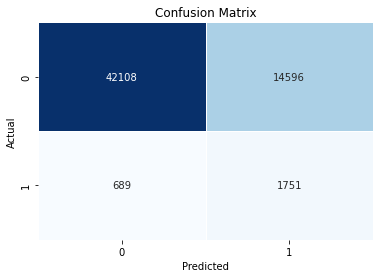

              precision    recall  f1-score   support

           0       0.98      0.74      0.85     56704
           1       0.11      0.72      0.19      2440

    accuracy                           0.74     59144
   macro avg       0.55      0.73      0.52     59144
weighted avg       0.95      0.74      0.82     59144

Decision Tree Classifier
----------


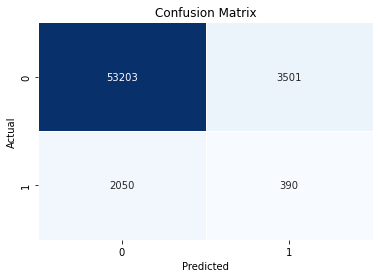

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     56704
           1       0.10      0.16      0.12      2440

    accuracy                           0.91     59144
   macro avg       0.53      0.55      0.54     59144
weighted avg       0.93      0.91      0.92     59144



C:\Users\mohit\anaconda3a\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors
----------


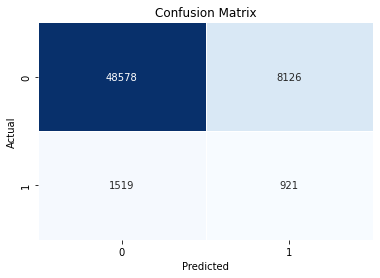

              precision    recall  f1-score   support

           0       0.97      0.86      0.91     56704
           1       0.10      0.38      0.16      2440

    accuracy                           0.84     59144
   macro avg       0.54      0.62      0.54     59144
weighted avg       0.93      0.84      0.88     59144

Random Forest
----------


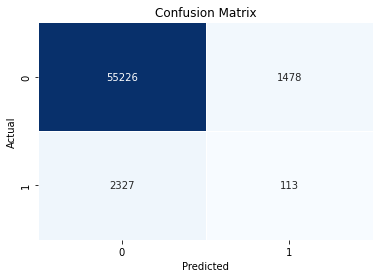

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     56704
           1       0.07      0.05      0.06      2440

    accuracy                           0.94     59144
   macro avg       0.52      0.51      0.51     59144
weighted avg       0.92      0.94      0.93     59144

GB
----------


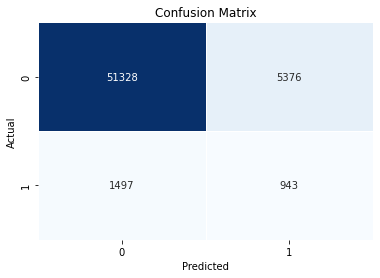

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     56704
           1       0.15      0.39      0.22      2440

    accuracy                           0.88     59144
   macro avg       0.56      0.65      0.58     59144
weighted avg       0.94      0.88      0.91     59144



Model Accuracy Score Precision  Recall F1 Score ROC-AUC
0        LogisticRegression         74.16%    10.71%  71.76%   18.64%  80.83%
1  Decision Tree Classifier         90.61%    10.02%  15.98%   12.32%  54.85%
2       K-Nearest Neighbors         83.69%    10.18%  37.75%   16.04%  65.77%
3             Random Forest         93.57%      7.1%   4.63%    5.61%  75.36%
4                        GB         88.38%    14.92%  38.65%   21.53%  78.85%

In [120]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=200),
    'Decision Tree Classifier': DecisionTreeClassifier(splitter='best',random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=57),
    'GB': GradientBoostingClassifier()
}

results = []

for model_name, model in models.items():
    model.fit(X_resampled_smote, y_resampled_smote)  
    y_pred = model.predict(X_test_new_2)
    y_pred_prob = model.predict_proba(X_test_new_2)[:, 1]
    
    print(model_name)
    print("-"*10)
    
    confusion = confusion_matrix(y_test_new_2, y_pred)
    accuracy = round(accuracy_score(y_test_new_2, y_pred) * 100, 2)
    precision = round(precision_score(y_test_new_2, y_pred) * 100, 2)
    recall = round(recall_score(y_test_new_2, y_pred) * 100, 2)
    f1 = round(f1_score(y_test_new_2, y_pred) * 100, 2)
    roc = round(roc_auc_score(y_test_new_2, y_pred_prob) * 100, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(classification_report(y_test_new_2, y_pred))
    results.append({
        'Model': model_name,
        'Accuracy Score': f"{accuracy}%",
        'Precision': f"{precision}%",
        'Recall': f"{recall}%",
        'F1 Score': f"{f1}%",
        'ROC-AUC': f"{roc}%"
    })

results_df = pd.DataFrame(results)
display(results_df)

# As our primary objective is to accurately identify strokes, we should prioritize recall. 
Based on the metrics in the table, **Logistic Regression performs better overall, with a good balance of accuracy, recall, and ROC-AUC. In contrast, both the **Decision Tree and Random Forest models perform poorly** across all key metrics, indicating they may not be suitable for this task.